In [34]:
# The below libaries are specific to the skeltonize processing function and the fil_finder library requires you use pip
import astropy.units
from fil_finder import FilFinder2D
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import pandas as pd
import pygmt
import shutil
from skimage.morphology import skeletonize, flood_fill
import sys
import xarray as xr

In [35]:
import skeletonFunctions

import importlib
importlib.reload(skeletonFunctions)

<module 'skeletonFunctions' from '/Users/jono/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/makeSkeltons/skeletonFunctions.py'>

In [36]:
elevationsPath = 'paleoElevations'

In [37]:
outdir = 'skeletons'
if os.path.isdir(f'{outdir}'):
	shutil.rmtree(f'{outdir}')
os.makedirs(outdir)

for f in os.listdir(elevationsPath):
    if f.endswith('.nc'):
        grid = os.path.join(elevationsPath,f)
    else:
        continue

    if os.path.exists(f'{os.getcwd()}/{f}'):
        os.remove(f'{os.getcwd()}/{f}')

    shutil.copy(f'{grid}', os.path.join(os.getcwd(), f'{f}'))
    grid=f
    
    smoothMask = skeletonFunctions.makeSmoothMask(grid)
    landSkel = skeletonFunctions.generate_gateway(smoothMask, ocean_or_land='land')
    oceanSkel = skeletonFunctions.generate_gateway(smoothMask, ocean_or_land='ocean')

    shutil.move(landSkel,outdir)
    shutil.move(oceanSkel,outdir)
    os.remove(grid)

Identifying unique bodies of water
Floodfill of water bodies done
Now checking connectivity of water across grid edges
uh oh, there is connected water across the grid edges
fixing..
Detected 77 unique bodies of water
Looking at water body #1
This water body takes up 32738 cells
This water body is big enough to stay
Looking at water body #2
This water body takes up 35 cells
Min sea size is 500, so turning this to land
Looking at water body #3
This water body takes up 51 cells
Min sea size is 500, so turning this to land
Looking at water body #4
This water body takes up 17 cells
Min sea size is 500, so turning this to land
Looking at water body #5
This water body takes up 17 cells
Min sea size is 500, so turning this to land
Looking at water body #6
This water body takes up 5665 cells
This water body is big enough to stay
Looking at water body #7
This water body takes up 14 cells
Min sea size is 500, so turning this to land
Looking at water body #8
This water body takes up 15 cells
Min s

/Users/jono/opt/anaconda3/envs/gateways2/lib/python3.10/site-packages/fil_finder/filfinder2D.py:142: UserWarning: No beam width given. Using 0 pixels.
  warnings.warn("No beam width given. Using 0 pixels.")
/Users/jono/opt/anaconda3/envs/gateways2/lib/python3.10/site-packages/fil_finder/filfinder2D.py:296: UserWarning: Using inputted mask. Skipping creation of anew mask.
  warnings.warn("Using inputted mask. Skipping creation of a"
/Users/jono/opt/anaconda3/envs/gateways2/lib/python3.10/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")


Identifying unique bodies of water
Floodfill of water bodies done
Now checking connectivity of water across grid edges
uh oh, there is connected water across the grid edges
fixing..
Detected 69 unique bodies of water
Looking at water body #1
This water body takes up 27310 cells
This water body is big enough to stay
Looking at water body #2
This water body takes up 5463 cells
This water body is big enough to stay
Looking at water body #3
This water body takes up 6 cells
Min sea size is 500, so turning this to land
Looking at water body #4
This water body takes up 5220 cells
This water body is big enough to stay
Looking at water body #5
This water body takes up 39 cells
Min sea size is 500, so turning this to land
Looking at water body #6
This water body takes up 9353 cells
This water body is big enough to stay
Looking at water body #7
This water body takes up 29 cells
Min sea size is 500, so turning this to land
Looking at water body #8
This water body takes up 208 cells
Min sea size is

/Users/jono/opt/anaconda3/envs/gateways2/lib/python3.10/site-packages/fil_finder/length.py:282: RuntimeWarning: invalid value encountered in scalar divide
  w * (intensity[idx] / np.sum(intensity))


Identifying unique bodies of water
Floodfill of water bodies done
Now checking connectivity of water across grid edges
uh oh, there is connected water across the grid edges
fixing..
uh oh, there is connected water across the grid edges
fixing..
uh oh, there is connected water across the grid edges
fixing..
Detected 152 unique bodies of water
Looking at water body #1
This water body takes up 26553 cells
This water body is big enough to stay
Looking at water body #2
This water body takes up 1 cells
Min sea size is 500, so turning this to land
Looking at water body #3
This water body takes up 13 cells
Min sea size is 500, so turning this to land
Looking at water body #4
This water body takes up 2 cells
Min sea size is 500, so turning this to land
Looking at water body #5
This water body takes up 6 cells
Min sea size is 500, so turning this to land
Looking at water body #6
This water body takes up 23506 cells
This water body is big enough to stay
Looking at water body #7
This water body ta

In [38]:
# Hopefully all the gateways are sitting in a folder
# For each age there should be a gateway for land, and one for water
# Let's plot these to check they look ok
import imageio
import pygmt

if os.path.exists('skeletonFigs'):
    shutil.rmtree('skeletonFigs')
os.makedirs('skeletonFigs')

proj="Q15c"
# proj="W0/15c"
region='d' # d = Global region
anot_spacing="a30f15g30"
w="1.5p,black" # default pen settings for drawing plate boundaries etc
bar="JBC+o0/1.2"

images = []
for f in os.listdir('paleoElevations'):
    age = f.split('_')[-2]
    ocean_skel = f'skeletons/skeleton_ocean_topo_{age}_filled.nc'
    land_skel = f'skeletons/skeleton_land_topo_{age}_filled.nc'
    originalElevs = f'paleoElevations/{f}'

    fig = pygmt.Figure()

    etopo_cpt = pygmt.makecpt(cmap='etopo1', series=[-10000,10000,500])
    fig.grdimage(grid=f'{originalElevs}?z', cmap=etopo_cpt, projection=proj, region=region, frame=[f'+t"{age}Ma Gateways"', anot_spacing])
    fig.grdcontour(grid=f'{ocean_skel}?pruned_trimmed_skel_noDiagonal', interval='+0.5', pen='1.2p,black', region=region, projection=proj)
    fig.grdcontour(grid=f'{land_skel}?pruned_trimmed_skel_noDiagonal', interval='+0.5', pen='1.2p,red', region=region, projection=proj)
    fig.colorbar(position=bar, cmap=etopo_cpt, frame=["a4000f2000", "x+lElevation", "y+lm"])

    fig.savefig(f'skeletonFigs/{age.zfill(4)}_DEM.png')
    images.append(f'skeletonFigs/{age.zfill(4)}_DEM.png')

readims = []
for im in sorted(images):
    readims.append(imageio.v2.imread(im))
imageio.v2.mimwrite(f'skeletonFigs/animation.gif',readims,duration=2000)


## Implementing the gateways

Also contained here are grids that have been coarsened to the model resolution. In this part we will 'overlay' the skeletons on the coarse grids, then enforce gateways.

In [39]:
coarsenedPath = 'filtered_coarsened_grids'

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_90_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_90_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_90_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.136719/1.19922] exceeds extrema of input grid [0/1]; to clip output u

coarsened_90.nc
90
Lat extent of big cell: (-56.25, -50.625)
Lon extent of big cell: (-50.625, -45.0)
Lat, Lon of the skeleton cell: (-53.4375, -47.8125)

Lat extent of big cell: (-50.625, -45.0)
Lon extent of big cell: (-50.625, -45.0)
Lat, Lon of the skeleton cell: (-47.8125, -47.8125)

Lat extent of big cell: (16.875, 22.5)
Lon extent of big cell: (-67.5, -61.875)
Lat, Lon of the skeleton cell: (19.6875, -64.6875)

Lat extent of big cell: (16.875, 22.5)
Lon extent of big cell: (-61.875, -56.25)
Lat, Lon of the skeleton cell: (19.6875, -59.0625)

Lat extent of big cell: (16.875, 22.5)
Lon extent of big cell: (-56.25, -50.625)
Lat, Lon of the skeleton cell: (19.6875, -53.4375)

Lat extent of big cell: (22.5, 28.125)
Lon extent of big cell: (-73.125, -67.5)
Lat, Lon of the skeleton cell: (25.3125, -70.3125)

Lat extent of big cell: (22.5, 28.125)
Lon extent of big cell: (-67.5, -61.875)
Lat, Lon of the skeleton cell: (25.3125, -64.6875)

Lat extent of big cell: (33.75, 39.375)
Lon exte

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_80_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_80_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_80_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.136719/1.20312] exceeds extrema of input grid [0/1]; to clip output u

Number of times the skeleton fell within a land cell: 11/6194
coarsened_80.nc
80
Lat extent of big cell: (-45.0, -39.375)
Lon extent of big cell: (-56.25, -50.625)
Lat, Lon of the skeleton cell: (-42.1875, -53.4375)

Lat extent of big cell: (-33.75, -28.125)
Lon extent of big cell: (45.0, 50.625)
Lat, Lon of the skeleton cell: (-30.9375, 47.8125)

Lat extent of big cell: (-33.75, -28.125)
Lon extent of big cell: (50.625, 56.25)
Lat, Lon of the skeleton cell: (-30.9375, 53.4375)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-174.375, -168.75)
Lat, Lon of the skeleton cell: (81.5625, -171.5625)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-168.75, -163.125)
Lat, Lon of the skeleton cell: (81.5625, -165.9375)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-163.125, -157.5)
Lat, Lon of the skeleton cell: (81.5625, -160.3125)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-157.5, -151.875)
Lat, Lon of the skeleto

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_190_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_190_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_190_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.136719/0.917969] exceeds extrema of input grid [0/1]; to clip outp

Number of times the skeleton fell within a land cell: 10/5573
coarsened_190.nc
190
Lat extent of big cell: (-78.75, -73.125)
Lon extent of big cell: (73.125, 78.75)
Lat, Lon of the skeleton cell: (-75.9375, 75.9375)

Lat extent of big cell: (-78.75, -73.125)
Lon extent of big cell: (78.75, 84.375)
Lat, Lon of the skeleton cell: (-75.9375, 81.5625)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (-174.375, -168.75)
Lat, Lon of the skeleton cell: (59.0625, -171.5625)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (90.0, 95.625)
Lat, Lon of the skeleton cell: (59.0625, 92.8125)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (95.625, 101.25)
Lat, Lon of the skeleton cell: (59.0625, 98.4375)

Number of times the skeleton fell within a land cell: 5/2723


grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_250_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_250_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_250_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.167969/0.917969] exceeds extrema of input grid [0/1]; to clip outp

Lat extent of big cell: (45.0, 50.625)
Lon extent of big cell: (5.625, 11.25)
Lat, Lon of the skeleton cell: (47.8125, 8.4375)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (0.0, 5.625)
Lat, Lon of the skeleton cell: (53.4375, 2.8125)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (5.625, 11.25)
Lat, Lon of the skeleton cell: (53.4375, 8.4375)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (84.375, 90.0)
Lat, Lon of the skeleton cell: (59.0625, 87.1875)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (90.0, 95.625)
Lat, Lon of the skeleton cell: (59.0625, 92.8125)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (-50.625, -45.0)
Lat, Lon of the skeleton cell: (64.6875, -47.8125)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (-45.0, -39.375)
Lat, Lon of the skeleton cell: (64.6875, -42.1875)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (106.875, 112.5)
Lat, Lon of 

/var/folders/hp/drslwmbd3r7502z1wfd_w7bw0000gr/T/ipykernel_52965/2918108889.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(topo)
grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_240_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_240_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsa

Lat extent of big cell: (5.625, 11.25)
Lon extent of big cell: (-33.75, -28.125)
Lat, Lon of the skeleton cell: (8.4375, -30.9375)

Lat extent of big cell: (5.625, 11.25)
Lon extent of big cell: (-28.125, -22.5)
Lat, Lon of the skeleton cell: (8.4375, -25.3125)

Lat extent of big cell: (11.25, 16.875)
Lon extent of big cell: (-33.75, -28.125)
Lat, Lon of the skeleton cell: (14.0625, -30.9375)

Lat extent of big cell: (11.25, 16.875)
Lon extent of big cell: (-28.125, -22.5)
Lat, Lon of the skeleton cell: (14.0625, -25.3125)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (42.1875, 30.9375)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (50.625, 56.25)
Lat, Lon of the skeleton cell: (42.1875, 53.4375)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (-22.5, -16.875)
Lat, Lon of the skeleton cell: (75.9375, -19.6875)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (-16.875, -11

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_180_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_180_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_180_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.164062/1.19922] exceeds extrema of input grid [0/1]; to clip outpu

Number of times the skeleton fell within a land cell: 4/4244
coarsened_180.nc
180
Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (33.75, 39.375)
Lat, Lon of the skeleton cell: (-81.5625, 36.5625)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (39.375, 45.0)
Lat, Lon of the skeleton cell: (-81.5625, 42.1875)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (45.0, 50.625)
Lat, Lon of the skeleton cell: (-81.5625, 47.8125)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (50.625, 56.25)
Lat, Lon of the skeleton cell: (-81.5625, 53.4375)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (56.25, 61.875)
Lat, Lon of the skeleton cell: (-81.5625, 59.0625)

Lat extent of big cell: (-78.75, -73.125)
Lon extent of big cell: (33.75, 39.375)
Lat, Lon of the skeleton cell: (-75.9375, 36.5625)

Lat extent of big cell: (-78.75, -73.125)
Lon extent of big cell: (39.375, 45.0)
Lat, Lon of the skeleton cell: (-75

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_200_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_200_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_200_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.167969/1.19531] exceeds extrema of input grid [0/1]; to clip outpu

Lat extent of big cell: (45.0, 50.625)
Lon extent of big cell: (11.25, 16.875)
Lat, Lon of the skeleton cell: (47.8125, 14.0625)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (5.625, 11.25)
Lat, Lon of the skeleton cell: (53.4375, 8.4375)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (11.25, 16.875)
Lat, Lon of the skeleton cell: (53.4375, 14.0625)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (0.0, 5.625)
Lat, Lon of the skeleton cell: (59.0625, 2.8125)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (5.625, 11.25)
Lat, Lon of the skeleton cell: (59.0625, 8.4375)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (11.25, 16.875)
Lat, Lon of the skeleton cell: (59.0625, 14.0625)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (101.25, 106.875)
Lat, Lon of the skeleton cell: (59.0625, 104.0625)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (106.875, 112.5)
Lat, Lon

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_210_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_210_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_210_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.164062/1.19922] exceeds extrema of input grid [0/1]; to clip outpu

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (-11.25, -5.625)
Lat, Lon of the skeleton cell: (53.4375, -8.4375)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (-16.875, -11.25)
Lat, Lon of the skeleton cell: (59.0625, -14.0625)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (-11.25, -5.625)
Lat, Lon of the skeleton cell: (59.0625, -8.4375)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (78.75, 84.375)
Lat, Lon of the skeleton cell: (59.0625, 81.5625)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (84.375, 90.0)
Lat, Lon of the skeleton cell: (59.0625, 87.1875)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (90.0, 95.625)
Lat, Lon of the skeleton cell: (59.0625, 92.8125)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (95.625, 101.25)
Lat, Lon of the skeleton cell: (64.6875, 98.4375)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (-5.625, 0.0)
Lat

grdsample [INFORMATION]: netCDF grid skeletons/skeleton_ocean_topo_210_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_ocean_topo_210_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.132812/1.16797] exceeds extrema of input grid [0/1]; to clip output use -n...+c
grdsample [INFORMATION]: Writing grid to file tmp_ocean_skel.nc


Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (135.0, 140.625)
Lat, Lon of the skeleton cell: (53.4375, 137.8125)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (95.625, 101.25)
Lat, Lon of the skeleton cell: (64.6875, 98.4375)

Number of times the skeleton fell within a land cell: 2/2541


grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_0_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_0_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_0_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.132812/1.19531] exceeds extrema of input grid [0/1]; to clip output use 

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (78.75, 84.375)
Lat, Lon of the skeleton cell: (64.6875, 81.5625)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (84.375, 90.0)
Lat, Lon of the skeleton cell: (64.6875, 87.1875)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (-45.0, -39.375)
Lat, Lon of the skeleton cell: (70.3125, -42.1875)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (-39.375, -33.75)
Lat, Lon of the skeleton cell: (70.3125, -36.5625)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (-33.75, -28.125)
Lat, Lon of the skeleton cell: (70.3125, -30.9375)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (-28.125, -22.5)
Lat, Lon of the skeleton cell: (70.3125, -25.3125)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (-22.5, -16.875)
Lat, Lon of the skeleton cell: (70.3125, -19.6875)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (-16.875, -11.25

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_230_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_230_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_230_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.132812/1.16406] exceeds extrema of input grid [0/1]; to clip outpu

coarsened_230.nc
230
Number of times the skeleton fell within a land cell: 0/1984
Lat extent of big cell: (-33.75, -28.125)
Lon extent of big cell: (39.375, 45.0)
Lat, Lon of the skeleton cell: (-30.9375, 42.1875)

Lat extent of big cell: (-33.75, -28.125)
Lon extent of big cell: (45.0, 50.625)
Lat, Lon of the skeleton cell: (-30.9375, 47.8125)

Lat extent of big cell: (-33.75, -28.125)
Lon extent of big cell: (50.625, 56.25)
Lat, Lon of the skeleton cell: (-30.9375, 53.4375)



grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_220_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_220_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_220_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.164062/1.19531] exceeds extrema of input grid [0/1]; to clip outpu

Number of times the skeleton fell within a land cell: 3/4596
coarsened_220.nc
220
Number of times the skeleton fell within a land cell: 0/2308
Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (73.125, 78.75)
Lat, Lon of the skeleton cell: (59.0625, 75.9375)



grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_130_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_130_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_130_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: 28 (of 721) inconsistent grid values at South pole.
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (73.125, 78.75)
Lat, Lon of the skeleton cell: (64.6875, 75.9375)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (84.375, 90.0)
Lat, Lon of the skeleton cell: (64.6875, 87.1875)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (84.375, 90.0)
Lat, Lon of the skeleton cell: (70.3125, 87.1875)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (90.0, 95.625)
Lat, Lon of the skeleton cell: (70.3125, 92.8125)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (95.625, 101.25)
Lat, Lon of the skeleton cell: (70.3125, 98.4375)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (90.0, 95.625)
Lat, Lon of the skeleton cell: (75.9375, 92.8125)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (95.625, 101.25)
Lat, Lon of the skeleton cell: (75.9375, 98.4375)

Number of times the skeleton fell within a land cell: 8/4197
coarsened_130.nc
130
Lat exte

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_120_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_120_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_120_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.164062/1.19922] exceeds extrema of input grid [0/1]; to clip outpu

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (45.0, 50.625)
Lat, Lon of the skeleton cell: (70.3125, 47.8125)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (50.625, 56.25)
Lat, Lon of the skeleton cell: (70.3125, 53.4375)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (56.25, 61.875)
Lat, Lon of the skeleton cell: (70.3125, 59.0625)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (61.875, 67.5)
Lat, Lon of the skeleton cell: (70.3125, 64.6875)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (-45.0, -39.375)
Lat, Lon of the skeleton cell: (75.9375, -42.1875)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (50.625, 56.25)
Lat, Lon of the skeleton cell: (75.9375, 53.4375)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (118.125, 123.75)
Lat, Lon of the skeleton cell: (75.9375, 120.9375)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (123.75, 129.375)
La

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_100_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_100_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_100_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.167969/1.19531] exceeds extrema of input grid [0/1]; to clip outpu

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (61.875, 67.5)
Lat, Lon of the skeleton cell: (81.5625, 64.6875)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (67.5, 73.125)
Lat, Lon of the skeleton cell: (81.5625, 70.3125)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (73.125, 78.75)
Lat, Lon of the skeleton cell: (81.5625, 75.9375)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (140.625, 146.25)
Lat, Lon of the skeleton cell: (81.5625, 143.4375)

Number of times the skeleton fell within a land cell: 16/5566
coarsened_100.nc
100
Lat extent of big cell: (-67.5, -61.875)
Lon extent of big cell: (123.75, 129.375)
Lat, Lon of the skeleton cell: (-64.6875, 126.5625)

Lat extent of big cell: (-56.25, -50.625)
Lon extent of big cell: (-45.0, -39.375)
Lat, Lon of the skeleton cell: (-53.4375, -42.1875)

Lat extent of big cell: (-50.625, -45.0)
Lon extent of big cell: (-45.0, -39.375)
Lat, Lon of the skeleton cell: (-47.81

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_110_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_110_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_110_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.167969/1.19922] exceeds extrema of input grid [0/1]; to clip outpu

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (22.5, 28.125)
Lat, Lon of the skeleton cell: (59.0625, 25.3125)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (22.5, 28.125)
Lat, Lon of the skeleton cell: (64.6875, 25.3125)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (64.6875, 30.9375)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (22.5, 28.125)
Lat, Lon of the skeleton cell: (70.3125, 25.3125)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (45.0, 50.625)
Lat, Lon of the skeleton cell: (75.9375, 47.8125)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (50.625, 56.25)
Lat, Lon of the skeleton cell: (75.9375, 53.4375)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (56.25, 61.875)
Lat, Lon of the skeleton cell: (75.9375, 59.0625)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (61.875, 67.5)
Lat, Lon of

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_150_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_150_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_150_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.164062/1.19531] exceeds extrema of input grid [0/1]; to clip outpu

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (16.875, 22.5)
Lat, Lon of the skeleton cell: (42.1875, 19.6875)

Lat extent of big cell: (45.0, 50.625)
Lon extent of big cell: (16.875, 22.5)
Lat, Lon of the skeleton cell: (47.8125, 19.6875)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (16.875, 22.5)
Lat, Lon of the skeleton cell: (53.4375, 19.6875)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (22.5, 28.125)
Lat, Lon of the skeleton cell: (53.4375, 25.3125)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (22.5, 28.125)
Lat, Lon of the skeleton cell: (59.0625, 25.3125)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (59.0625, 30.9375)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (33.75, 39.375)
Lat, Lon of the skeleton cell: (70.3125, 36.5625)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (56.25, 61.875)
Lat, Lon of 

grdsample [INFORMATION]: Output grid extrema [-0.164062/1.19531] exceeds extrema of input grid [0/1]; to clip output use -n...+c
grdsample [INFORMATION]: Writing grid to file tmp_ocean_skel.nc


Lat extent of big cell: (-67.5, -61.875)
Lon extent of big cell: (-33.75, -28.125)
Lat, Lon of the skeleton cell: (-64.6875, -30.9375)

Lat extent of big cell: (-61.875, -56.25)
Lon extent of big cell: (-39.375, -33.75)
Lat, Lon of the skeleton cell: (-59.0625, -36.5625)

Lat extent of big cell: (-61.875, -56.25)
Lon extent of big cell: (-33.75, -28.125)
Lat, Lon of the skeleton cell: (-59.0625, -30.9375)

Lat extent of big cell: (-56.25, -50.625)
Lon extent of big cell: (-39.375, -33.75)
Lat, Lon of the skeleton cell: (-53.4375, -36.5625)

Lat extent of big cell: (-50.625, -45.0)
Lon extent of big cell: (-39.375, -33.75)
Lat, Lon of the skeleton cell: (-47.8125, -36.5625)

Lat extent of big cell: (0.0, 5.625)
Lon extent of big cell: (140.625, 146.25)
Lat, Lon of the skeleton cell: (2.8125, 143.4375)

Lat extent of big cell: (5.625, 11.25)
Lon extent of big cell: (-39.375, -33.75)
Lat, Lon of the skeleton cell: (8.4375, -36.5625)

Lat extent of big cell: (5.625, 11.25)
Lon extent of bi

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_140_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_140_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_140_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.132812/0.917969] exceeds extrema of input grid [0/1]; to clip outp

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (42.1875, 30.9375)

Lat extent of big cell: (45.0, 50.625)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (47.8125, 30.9375)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (53.4375, 30.9375)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (33.75, 39.375)
Lat, Lon of the skeleton cell: (53.4375, 36.5625)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (-106.875, -101.25)
Lat, Lon of the skeleton cell: (75.9375, -104.0625)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (-101.25, -95.625)
Lat, Lon of the skeleton cell: (75.9375, -98.4375)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (-95.625, -90.0)
Lat, Lon of the skeleton cell: (75.9375, -92.8125)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-106.875

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_160_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_160_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_160_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.136719/1.19531] exceeds extrema of input grid [0/1]; to clip outpu

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (42.1875, 30.9375)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (33.75, 39.375)
Lat, Lon of the skeleton cell: (42.1875, 36.5625)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (39.375, 45.0)
Lat, Lon of the skeleton cell: (42.1875, 42.1875)

Lat extent of big cell: (45.0, 50.625)
Lon extent of big cell: (22.5, 28.125)
Lat, Lon of the skeleton cell: (47.8125, 25.3125)

Lat extent of big cell: (45.0, 50.625)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (47.8125, 30.9375)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (0.0, 5.625)
Lat, Lon of the skeleton cell: (81.5625, 2.8125)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (5.625, 11.25)
Lat, Lon of the skeleton cell: (81.5625, 8.4375)

Number of times the skeleton fell within a land cell: 28/5452
coarsened_160.nc
160
Lat extent of

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_170_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_170_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_170_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: 233 (of 721) inconsistent grid values at North pole.
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATIO

Number of times the skeleton fell within a land cell: 19/5739
coarsened_170.nc
170
Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (-16.875, -11.25)
Lat, Lon of the skeleton cell: (-81.5625, -14.0625)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (-11.25, -5.625)
Lat, Lon of the skeleton cell: (-81.5625, -8.4375)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (-5.625, 0.0)
Lat, Lon of the skeleton cell: (-81.5625, -2.8125)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (0.0, 5.625)
Lat, Lon of the skeleton cell: (-81.5625, 2.8125)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (5.625, 11.25)
Lat, Lon of the skeleton cell: (-81.5625, 8.4375)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (11.25, 16.875)
Lat, Lon of the skeleton cell: (-81.5625, 14.0625)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (95.625, 101.25)
Lat, Lon of the skeleton cell: (-8

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_30_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_30_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_30_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.136719/1.20312] exceeds extrema of input grid [0/1]; to clip output u

coarsened_30.nc
30
Lat extent of big cell: (-56.25, -50.625)
Lon extent of big cell: (-73.125, -67.5)
Lat, Lon of the skeleton cell: (-53.4375, -70.3125)

Lat extent of big cell: (45.0, 50.625)
Lon extent of big cell: (16.875, 22.5)
Lat, Lon of the skeleton cell: (47.8125, 19.6875)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (-16.875, -11.25)
Lat, Lon of the skeleton cell: (53.4375, -14.0625)

Lat extent of big cell: (50.625, 56.25)
Lon extent of big cell: (-5.625, 0.0)
Lat, Lon of the skeleton cell: (53.4375, -2.8125)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (-11.25, -5.625)
Lat, Lon of the skeleton cell: (59.0625, -8.4375)

Number of times the skeleton fell within a land cell: 5/3723
Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (-180.0, -174.375)
Lat, Lon of the skeleton cell: (-81.5625, -177.1875)

Lat extent of big cell: (-84.375, -78.75)
Lon extent of big cell: (-174.375, -168.75)
Lat, Lon of the skeleton cell: (-81

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_20_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_20_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_20_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.167969/1.19922] exceeds extrema of input grid [0/1]; to clip output u

20
Lat extent of big cell: (-56.25, -50.625)
Lon extent of big cell: (-73.125, -67.5)
Lat, Lon of the skeleton cell: (-53.4375, -70.3125)

Lat extent of big cell: (-50.625, -45.0)
Lon extent of big cell: (-73.125, -67.5)
Lat, Lon of the skeleton cell: (-47.8125, -70.3125)

Lat extent of big cell: (28.125, 33.75)
Lon extent of big cell: (-11.25, -5.625)
Lat, Lon of the skeleton cell: (30.9375, -8.4375)

Lat extent of big cell: (28.125, 33.75)
Lon extent of big cell: (-5.625, 0.0)
Lat, Lon of the skeleton cell: (30.9375, -2.8125)

Lat extent of big cell: (33.75, 39.375)
Lon extent of big cell: (-11.25, -5.625)
Lat, Lon of the skeleton cell: (36.5625, -8.4375)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (11.25, 16.875)
Lat, Lon of the skeleton cell: (42.1875, 14.0625)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (16.875, 22.5)
Lat, Lon of the skeleton cell: (42.1875, 19.6875)

Lat extent of big cell: (61.875, 67.5)
Lon extent of big cell: (163.125, 1

grdsample [INFORMATION]: Enable all available threads (up to 10)


Lat extent of big cell: (28.125, 33.75)
Lon extent of big cell: (22.5, 28.125)
Lat, Lon of the skeleton cell: (30.9375, 25.3125)

Lat extent of big cell: (33.75, 39.375)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (36.5625, 30.9375)

Number of times the skeleton fell within a land cell: 2/5001
coarsened_10.nc
10


grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_10_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_10_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_10_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.167969/1.19531] exceeds extrema of input grid [0/1]; to clip output use -n...+c
grdsample [INFORMATION]: Writing grid to file tmp_land

Lat extent of big cell: (5.625, 11.25)
Lon extent of big cell: (101.25, 106.875)
Lat, Lon of the skeleton cell: (8.4375, 104.0625)

Lat extent of big cell: (16.875, 22.5)
Lon extent of big cell: (-101.25, -95.625)
Lat, Lon of the skeleton cell: (19.6875, -98.4375)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (61.875, 67.5)
Lat, Lon of the skeleton cell: (75.9375, 64.6875)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (67.5, 73.125)
Lat, Lon of the skeleton cell: (75.9375, 70.3125)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (56.25, 61.875)
Lat, Lon of the skeleton cell: (81.5625, 59.0625)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (61.875, 67.5)
Lat, Lon of the skeleton cell: (81.5625, 64.6875)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (67.5, 73.125)
Lat, Lon of the skeleton cell: (81.5625, 70.3125)

Number of times the skeleton fell within a land cell: 7/4074


grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_50_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_50_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_50_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.167969/1.20312] exceeds extrema of input grid [0/1]; to clip output u

Lat extent of big cell: (33.75, 39.375)
Lon extent of big cell: (45.0, 50.625)
Lat, Lon of the skeleton cell: (36.5625, 47.8125)

Lat extent of big cell: (33.75, 39.375)
Lon extent of big cell: (50.625, 56.25)
Lat, Lon of the skeleton cell: (36.5625, 53.4375)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (28.125, 33.75)
Lat, Lon of the skeleton cell: (42.1875, 30.9375)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (33.75, 39.375)
Lat, Lon of the skeleton cell: (42.1875, 36.5625)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (39.375, 45.0)
Lat, Lon of the skeleton cell: (42.1875, 42.1875)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (45.0, 50.625)
Lat, Lon of the skeleton cell: (42.1875, 47.8125)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (50.625, 56.25)
Lat, Lon of the skeleton cell: (42.1875, 53.4375)

Lat extent of big cell: (56.25, 61.875)
Lon extent of big cell: (-22.5, -16.875)
Lat, Lon o

grdsample [INFORMATION]: netCDF grid skeletons/skeleton_ocean_topo_50_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_ocean_topo_50_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_ocean_topo_50_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.164062/1.16797] exceeds extrema of input grid [0/1]; to clip output use -n...+c
grdsample [INFORMATION]: Writing grid to file tmp_ocean_skel.nc


Lat extent of big cell: (-61.875, -56.25)
Lon extent of big cell: (-67.5, -61.875)
Lat, Lon of the skeleton cell: (-59.0625, -64.6875)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (5.625, 11.25)
Lat, Lon of the skeleton cell: (70.3125, 8.4375)

Lat extent of big cell: (73.125, 78.75)
Lon extent of big cell: (39.375, 45.0)
Lat, Lon of the skeleton cell: (75.9375, 42.1875)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-174.375, -168.75)
Lat, Lon of the skeleton cell: (81.5625, -171.5625)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-168.75, -163.125)
Lat, Lon of the skeleton cell: (81.5625, -165.9375)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-163.125, -157.5)
Lat, Lon of the skeleton cell: (81.5625, -160.3125)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-157.5, -151.875)
Lat, Lon of the skeleton cell: (81.5625, -154.6875)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big ce

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_40_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_40_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_40_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.167969/1.20312] exceeds extrema of input grid [0/1]; to clip output u

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (5.625, 11.25)
Lat, Lon of the skeleton cell: (70.3125, 8.4375)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (11.25, 16.875)
Lat, Lon of the skeleton cell: (70.3125, 14.0625)

Number of times the skeleton fell within a land cell: 6/5863
coarsened_40.nc
40
Lat extent of big cell: (22.5, 28.125)
Lon extent of big cell: (45.0, 50.625)
Lat, Lon of the skeleton cell: (25.3125, 47.8125)

Lat extent of big cell: (28.125, 33.75)
Lon extent of big cell: (45.0, 50.625)
Lat, Lon of the skeleton cell: (30.9375, 47.8125)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (11.25, 16.875)
Lat, Lon of the skeleton cell: (42.1875, 14.0625)

Lat extent of big cell: (39.375, 45.0)
Lon extent of big cell: (22.5, 28.125)
Lat, Lon of the skeleton cell: (42.1875, 25.3125)

Lat extent of big cell: (67.5, 73.125)
Lon extent of big cell: (5.625, 11.25)
Lat, Lon of the skeleton cell: (70.3125, 8.4375)

Lat extent of bi

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_60_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_60_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_60_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.164062/1.20312] exceeds extrema of input grid [0/1]; to clip output u

Number of times the skeleton fell within a land cell: 8/5969
coarsened_60.nc
60
Lat extent of big cell: (-39.375, -33.75)
Lon extent of big cell: (-61.875, -56.25)
Lat, Lon of the skeleton cell: (-36.5625, -59.0625)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-174.375, -168.75)
Lat, Lon of the skeleton cell: (81.5625, -171.5625)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-168.75, -163.125)
Lat, Lon of the skeleton cell: (81.5625, -165.9375)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-163.125, -157.5)
Lat, Lon of the skeleton cell: (81.5625, -160.3125)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-157.5, -151.875)
Lat, Lon of the skeleton cell: (81.5625, -154.6875)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-151.875, -146.25)
Lat, Lon of the skeleton cell: (81.5625, -149.0625)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-146.25, -140.625)
Lat, Lon of the 

grdsample [INFORMATION]: Enable all available threads (up to 10)
grdsample [INFORMATION]: Processing input grid
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_70_filled.nc has no default CPT.
grdsample [INFORMATION]: netCDF grid skeletons/skeleton_land_topo_70_filled.nc information has zmin = zmax = NaN. Reset to 0/0.
grdsample [INFORMATION]: Input  grid (-180/180/-90/90) n_columns = 721 n_rows = 361 dx = 0.5 dy = 0.5 registration = 0
grdsample [INFORMATION]: Output grid (-180/180/-90/90) n_columns = 720 n_rows = 360 dx = 0.5 dy = 0.5 registration = 1
grdsample [INFORMATION]: Reading grid from file skeletons/skeleton_land_topo_70_filled.nc?pruned_trimmed_skel_noDiagonal
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for top    edge: geographic
grdsample [INFORMATION]: gmt_grd_BC_set: Set boundary condition for bottom edge: geographic
grdsample [INFORMATION]: Output grid extrema [-0.167969/1.20312] exceeds extrema of input grid [0/1]; to clip output u

coarsened_70.nc
70
Lat extent of big cell: (-50.625, -45.0)
Lon extent of big cell: (-61.875, -56.25)
Lat, Lon of the skeleton cell: (-47.8125, -59.0625)

Lat extent of big cell: (-45.0, -39.375)
Lon extent of big cell: (-61.875, -56.25)
Lat, Lon of the skeleton cell: (-42.1875, -59.0625)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-174.375, -168.75)
Lat, Lon of the skeleton cell: (81.5625, -171.5625)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-168.75, -163.125)
Lat, Lon of the skeleton cell: (81.5625, -165.9375)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-95.625, -90.0)
Lat, Lon of the skeleton cell: (81.5625, -92.8125)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (-90.0, -84.375)
Lat, Lon of the skeleton cell: (81.5625, -87.1875)

Lat extent of big cell: (78.75, 84.375)
Lon extent of big cell: (151.875, 157.5)
Lat, Lon of the skeleton cell: (81.5625, 154.6875)

Lat extent of big cell: (78.75, 84.3

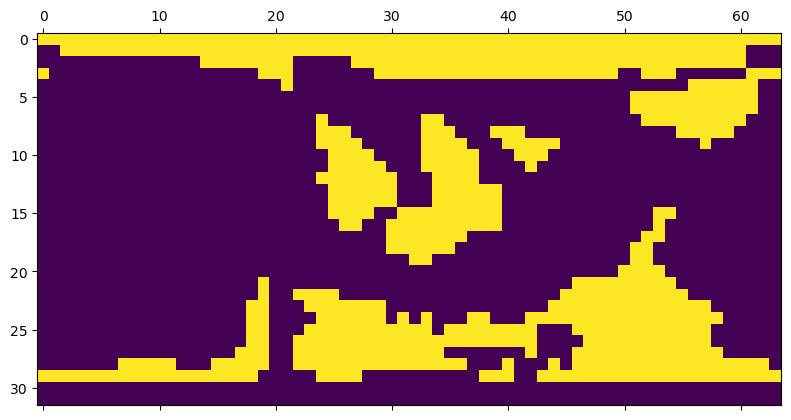

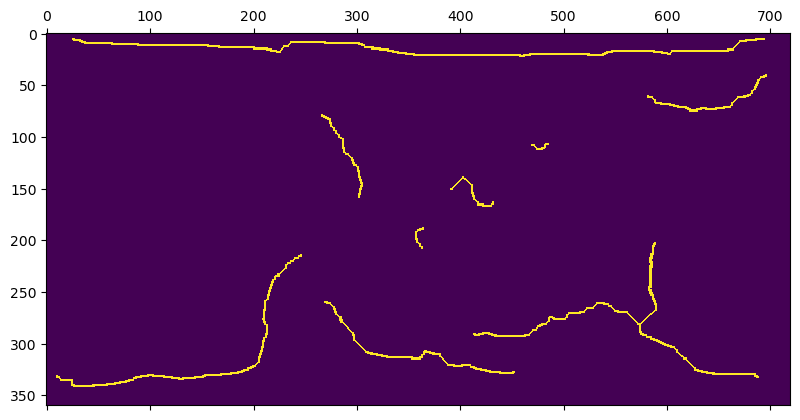

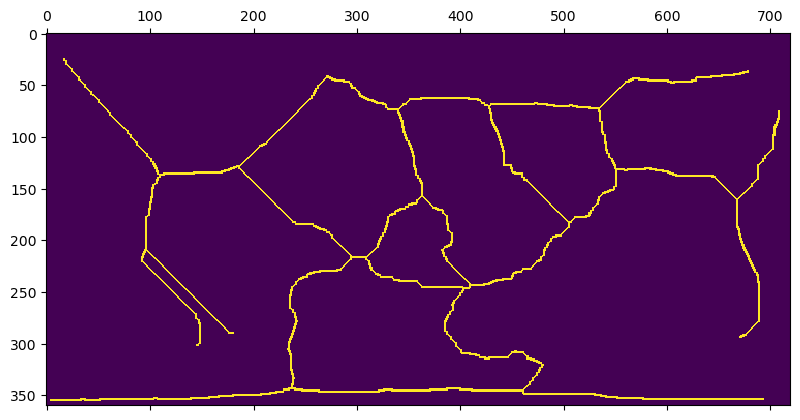

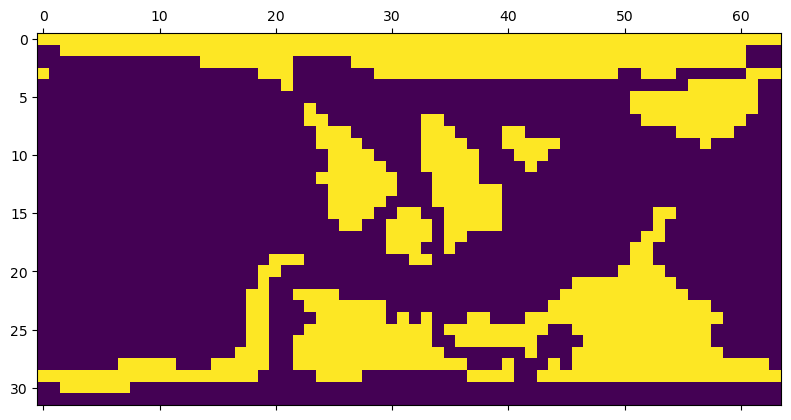

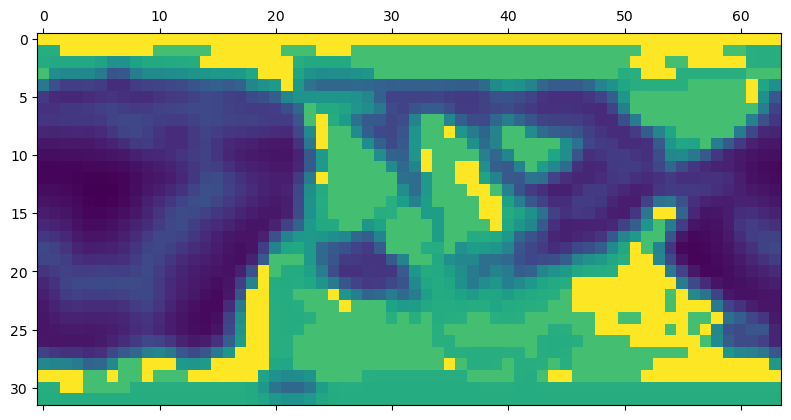

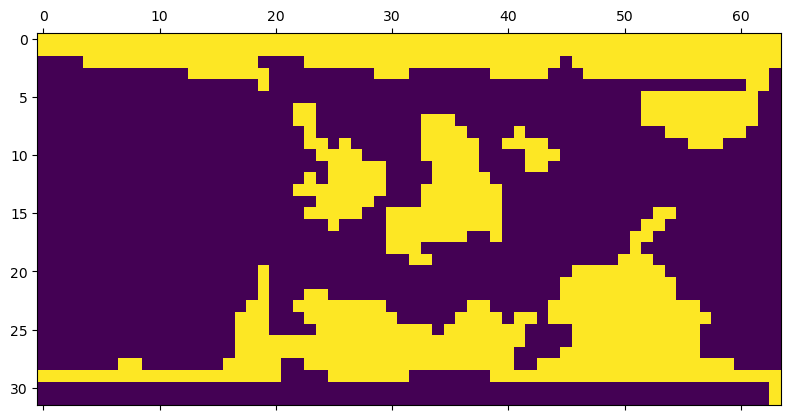

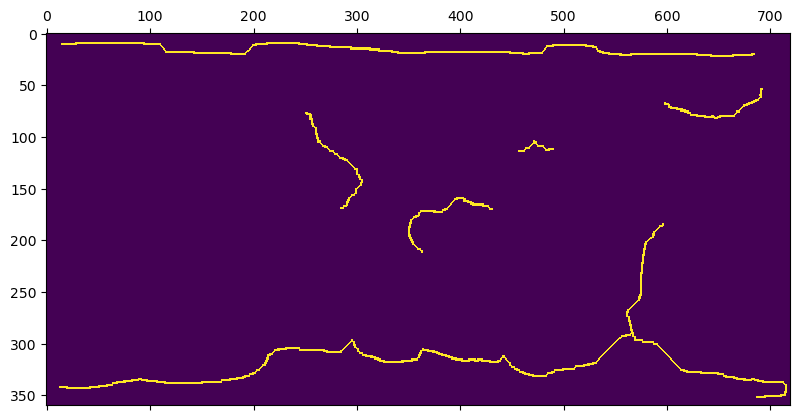

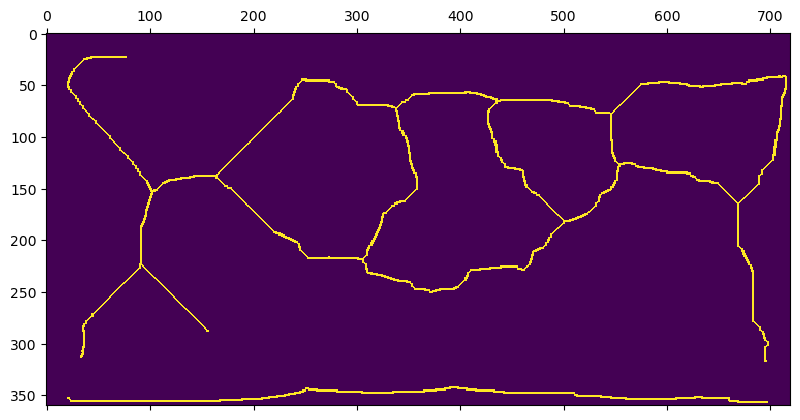

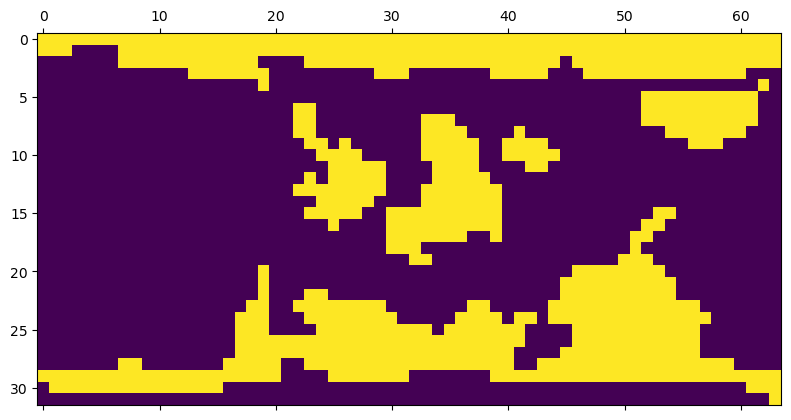

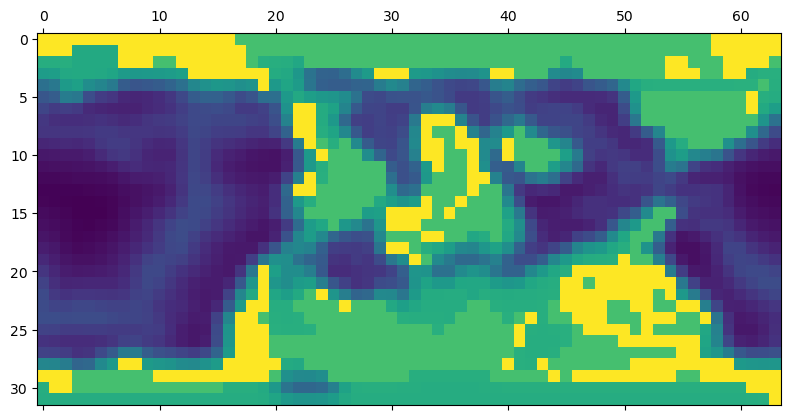

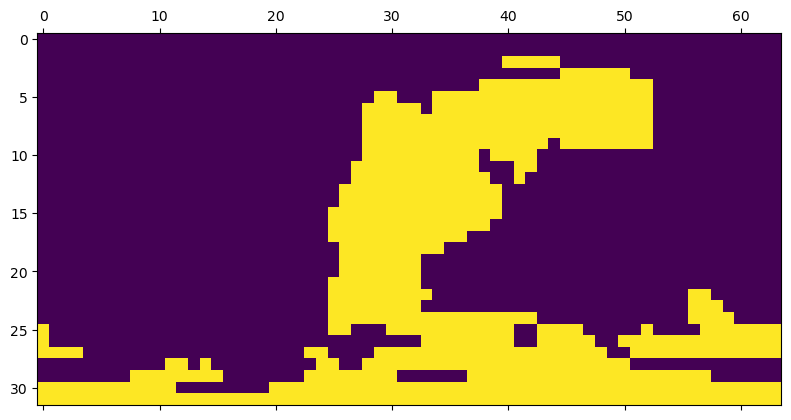

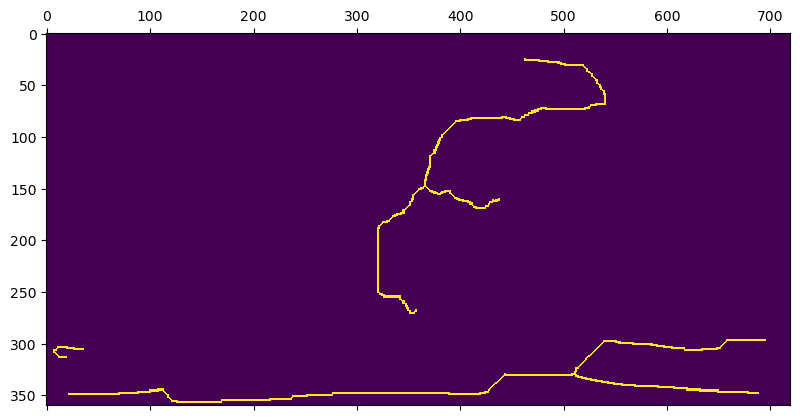

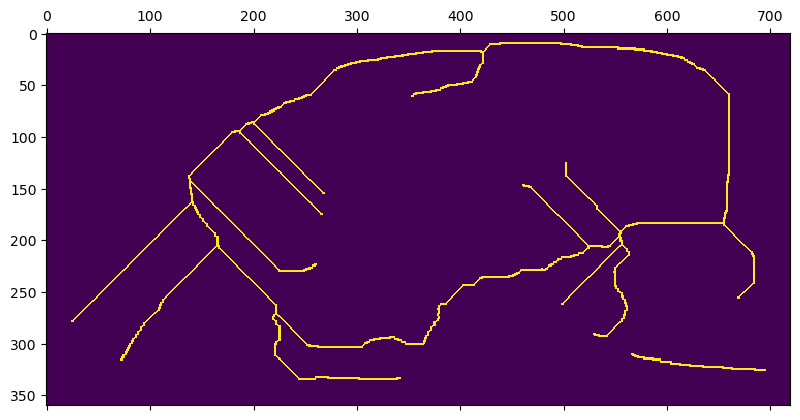

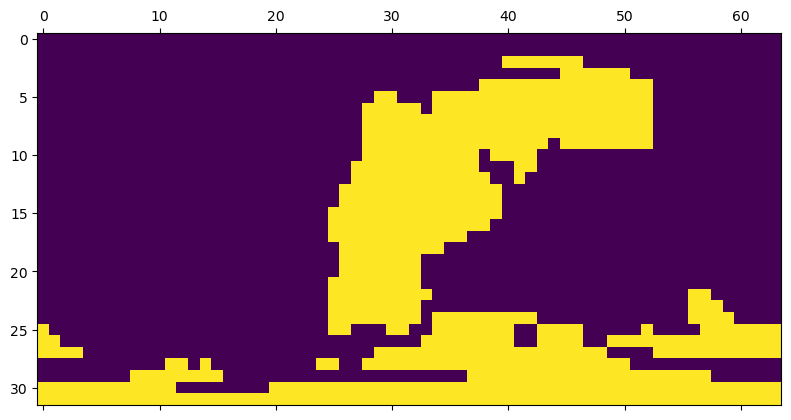

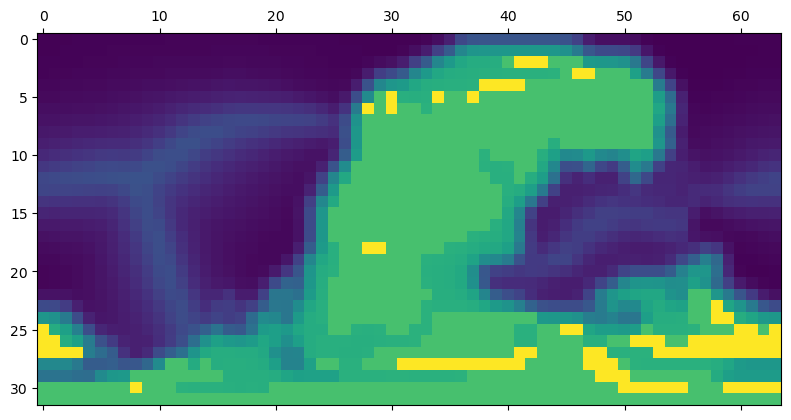

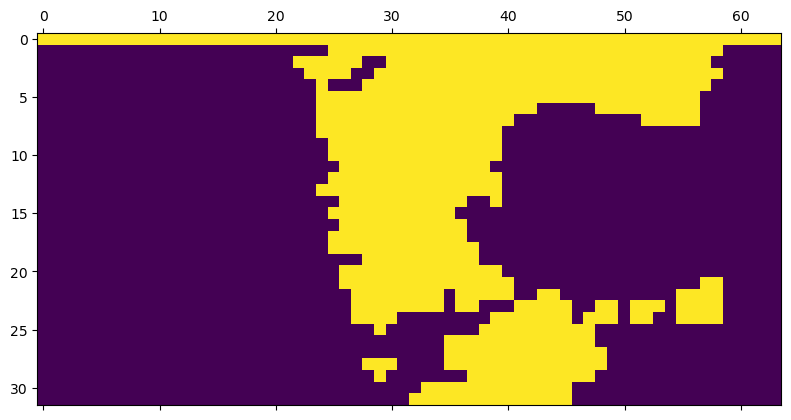

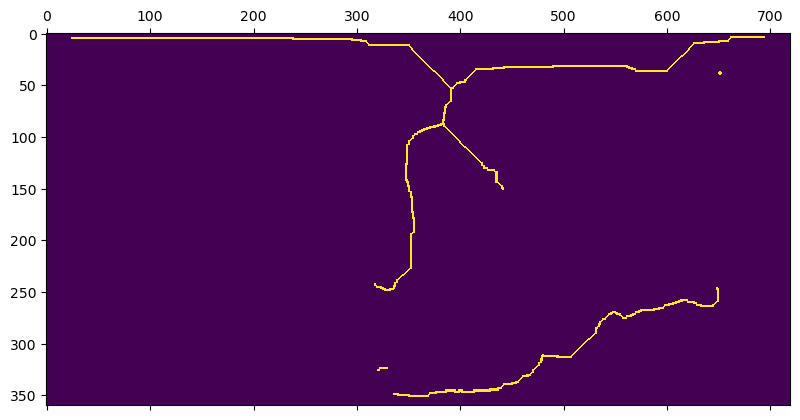

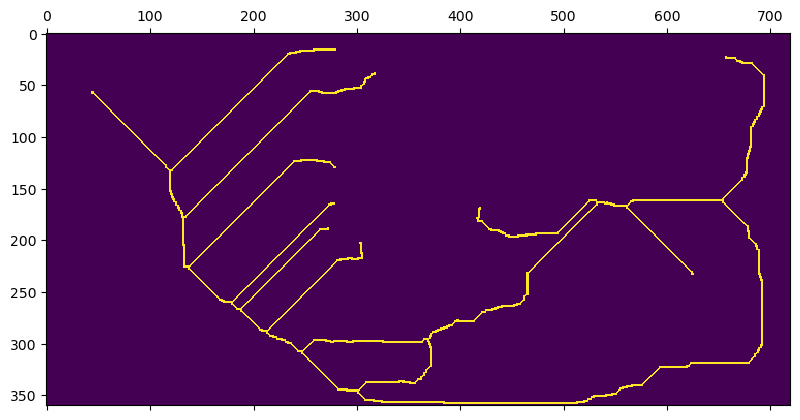

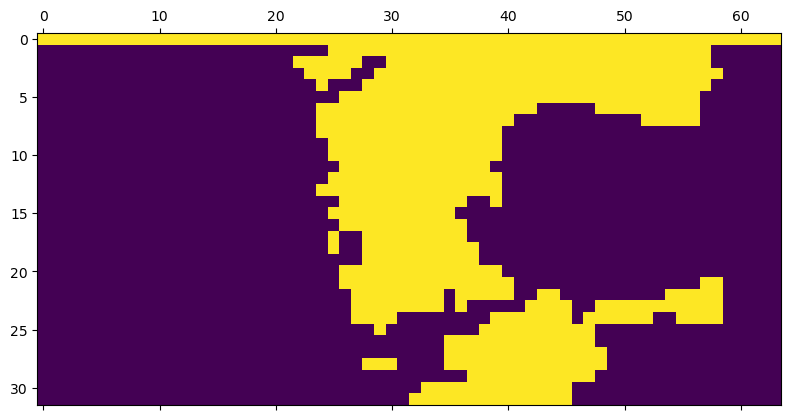

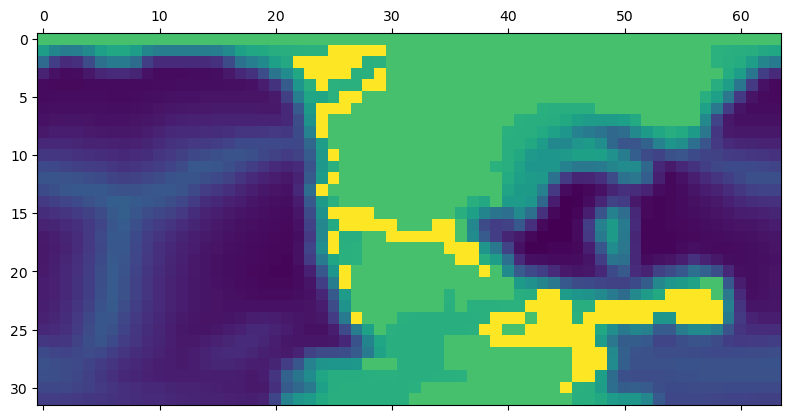

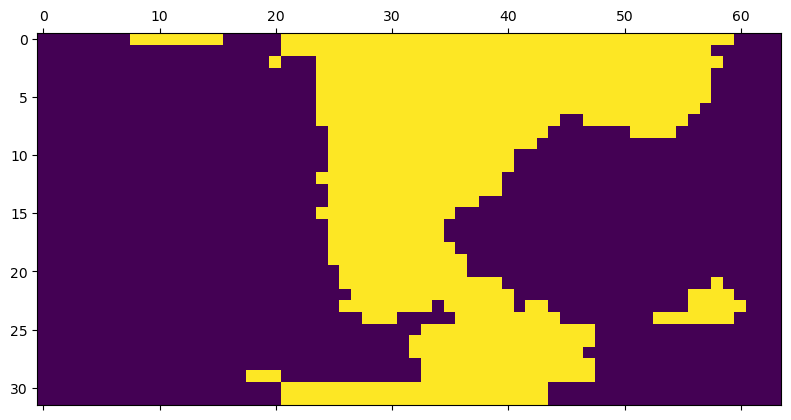

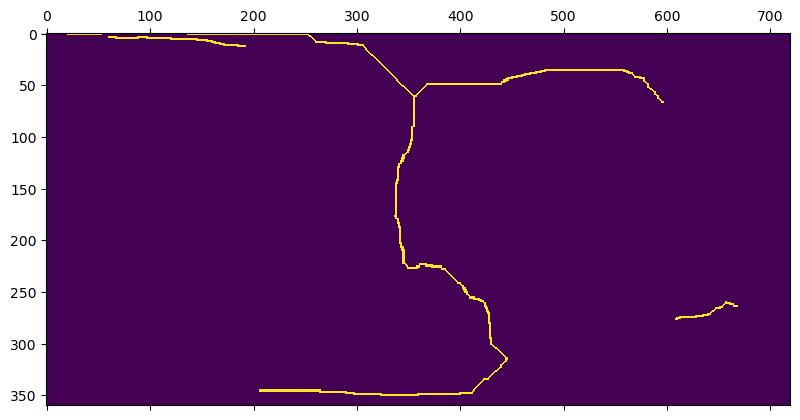

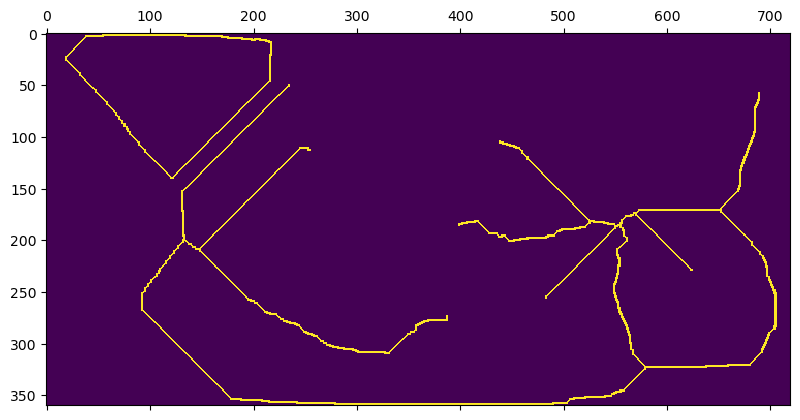

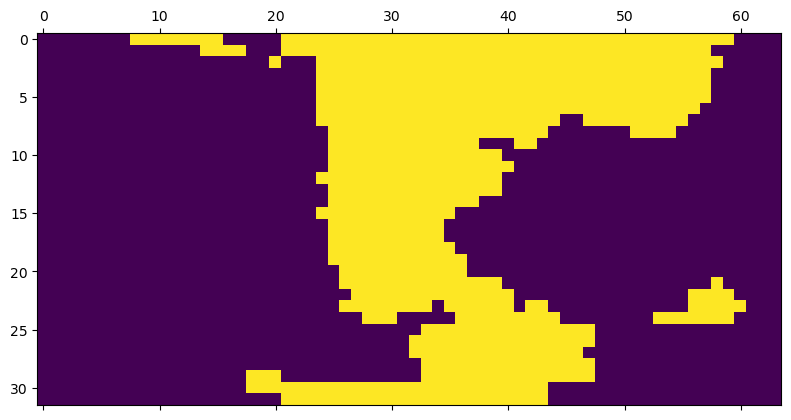

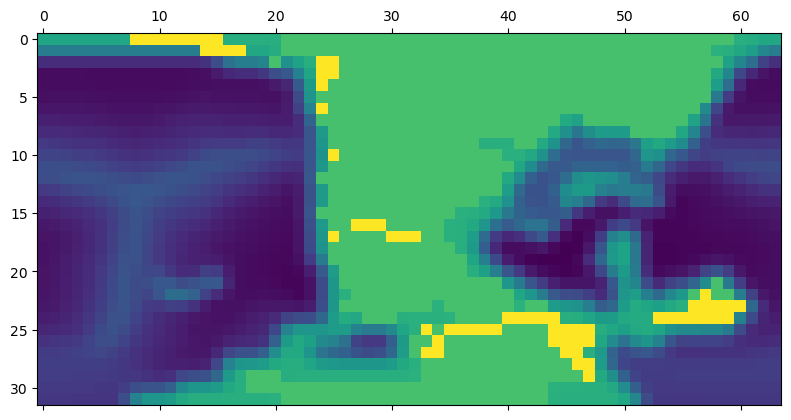

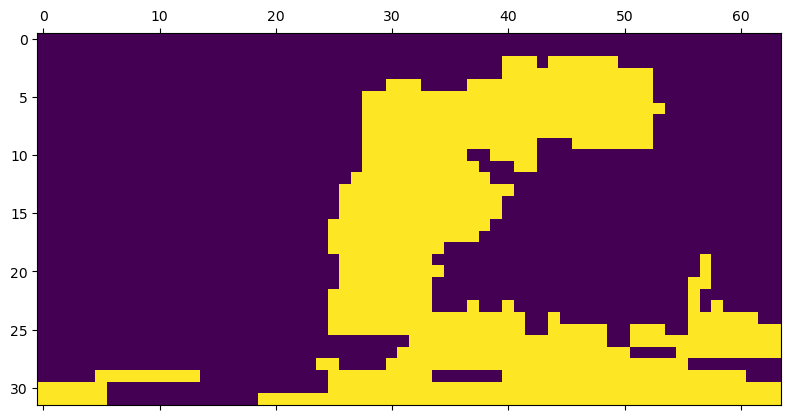

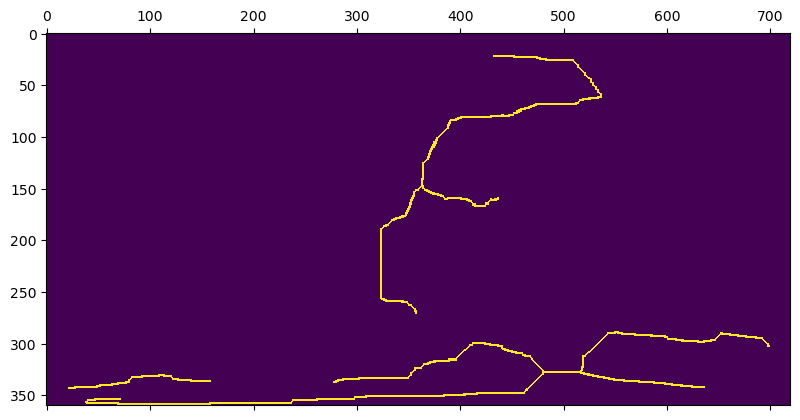

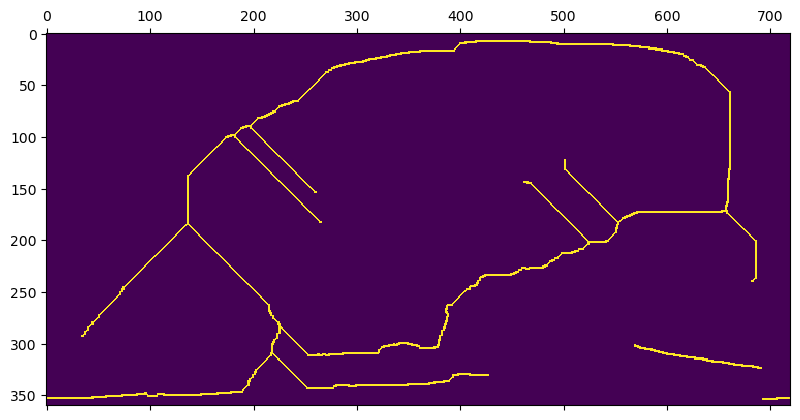

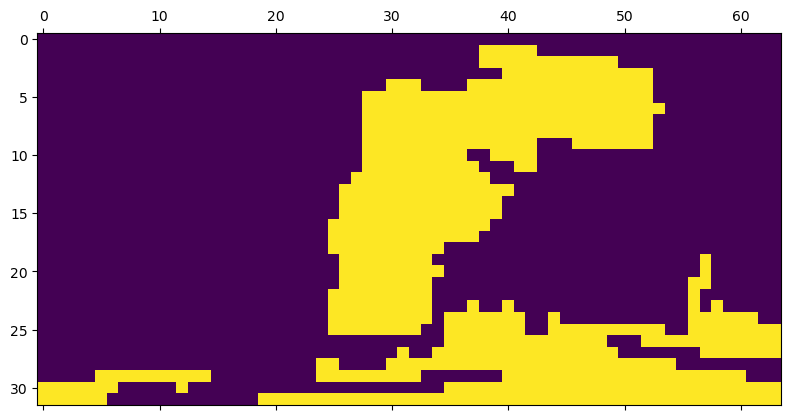

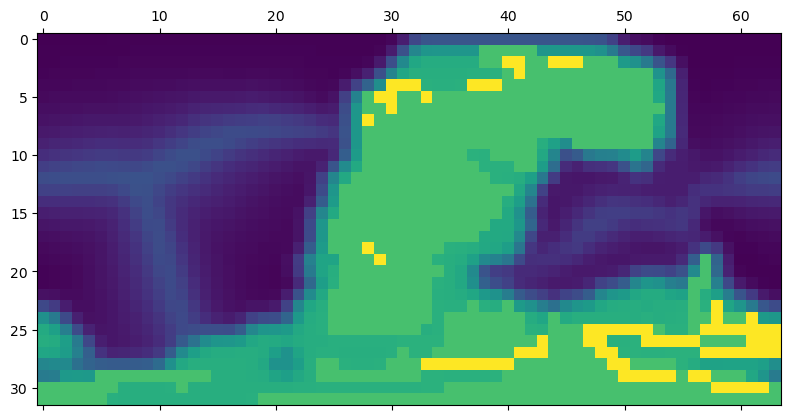

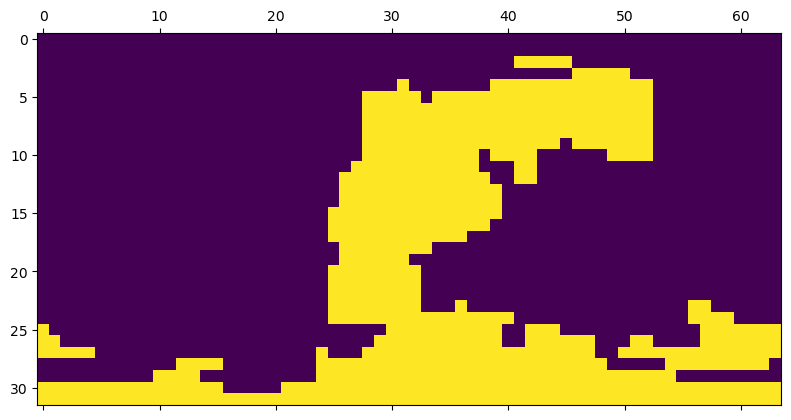

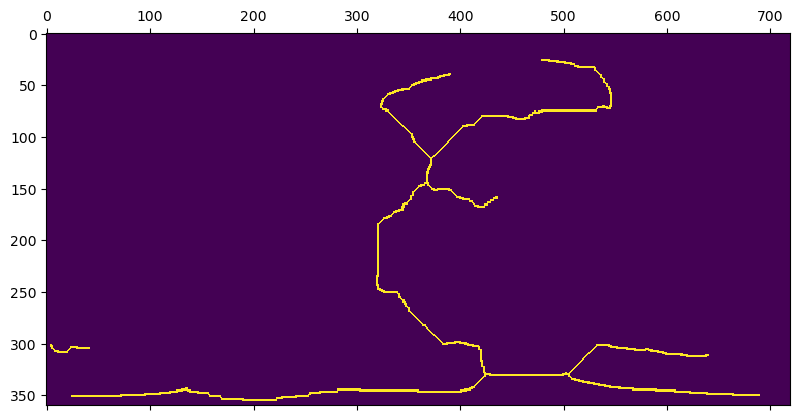

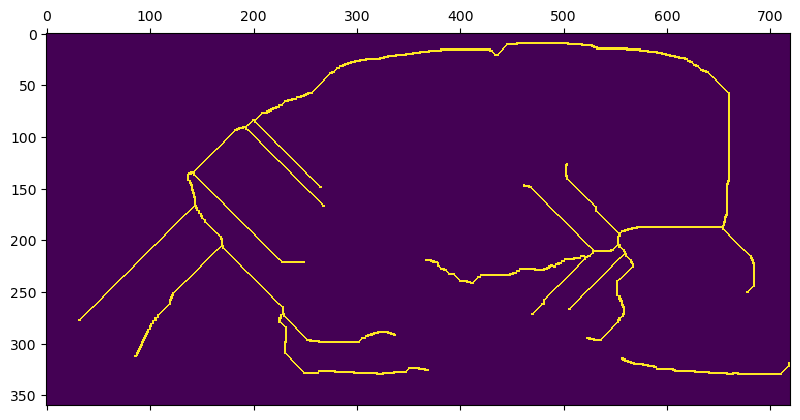

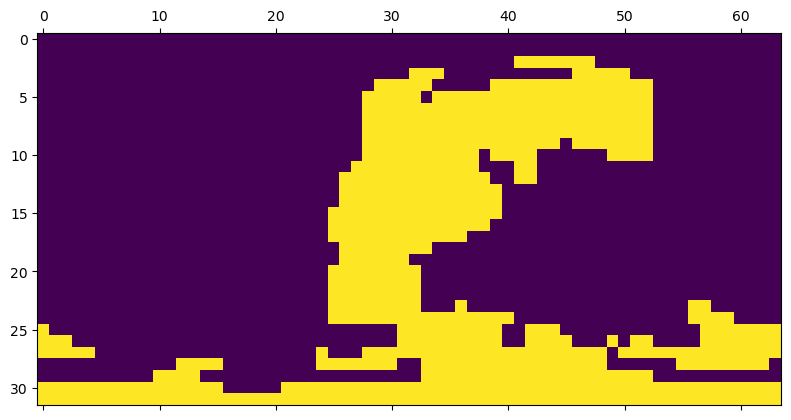

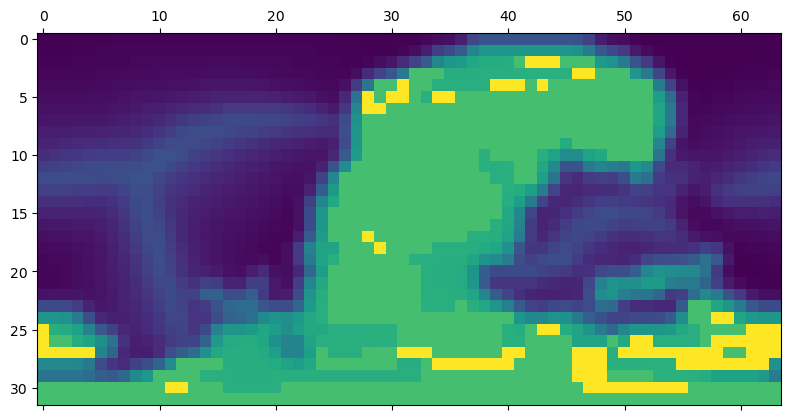

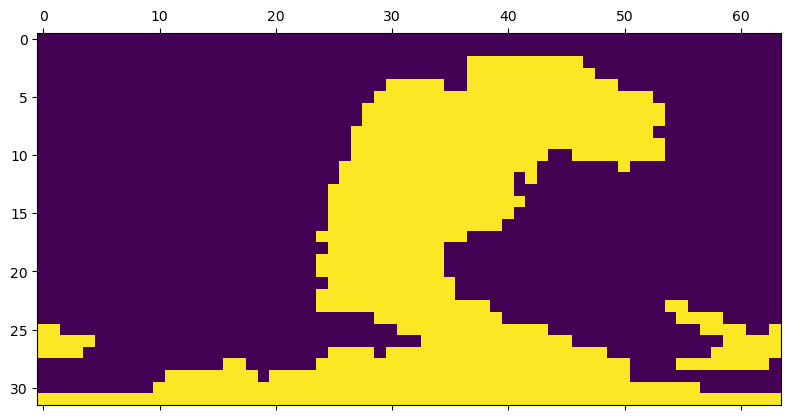

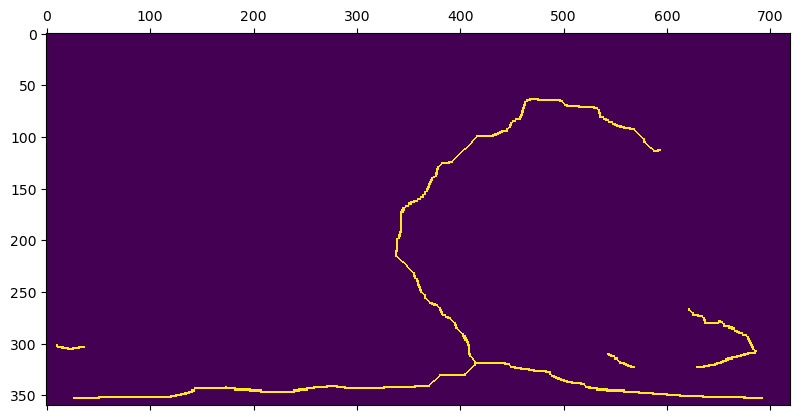

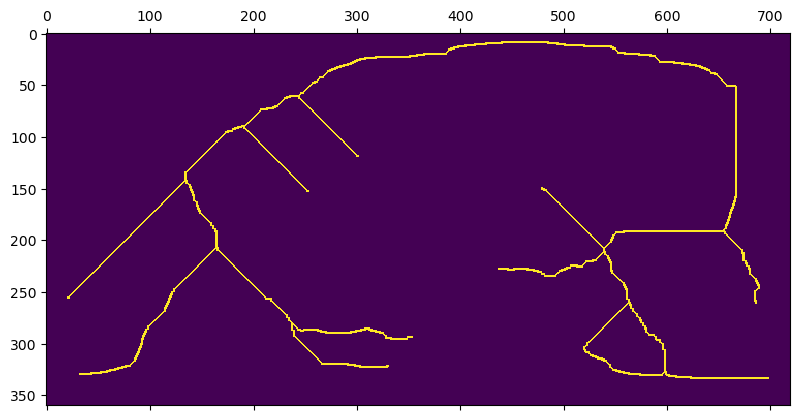

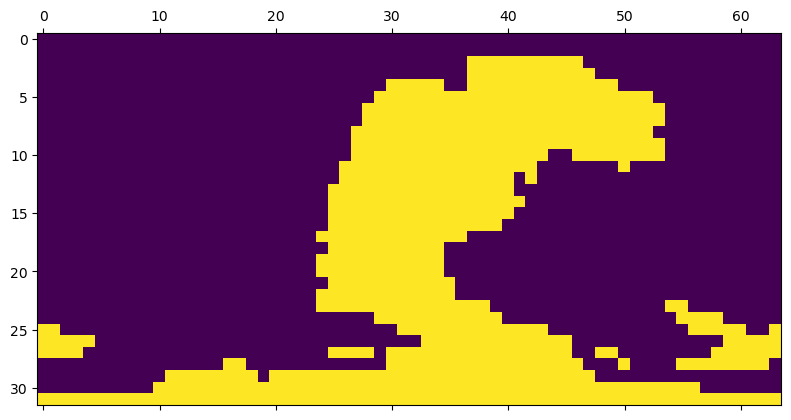

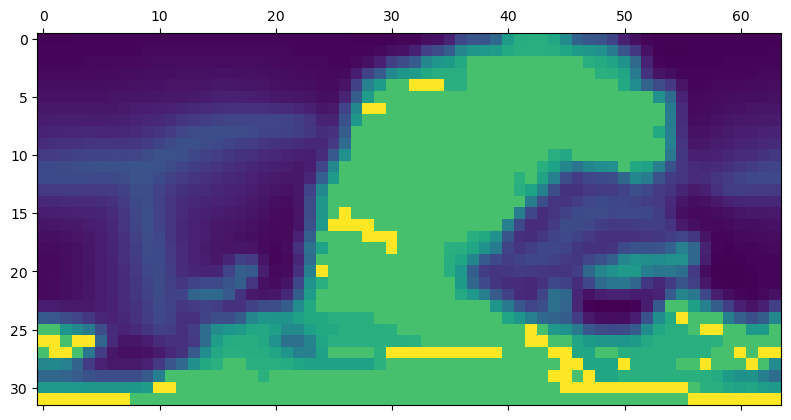

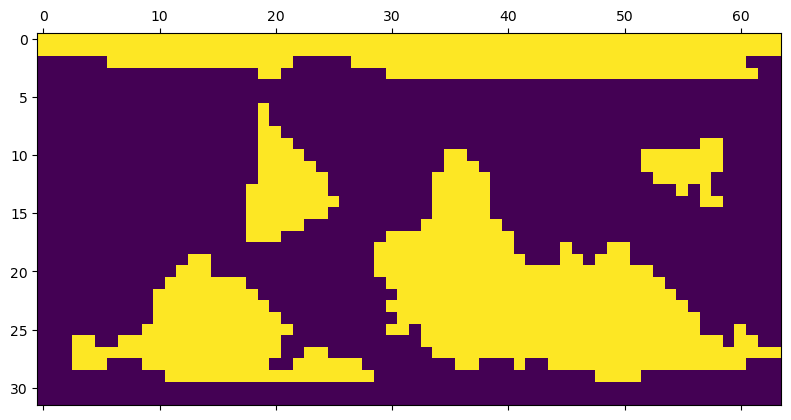

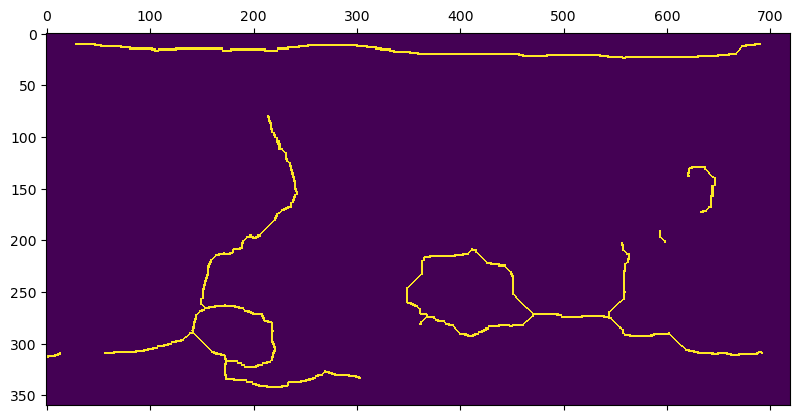

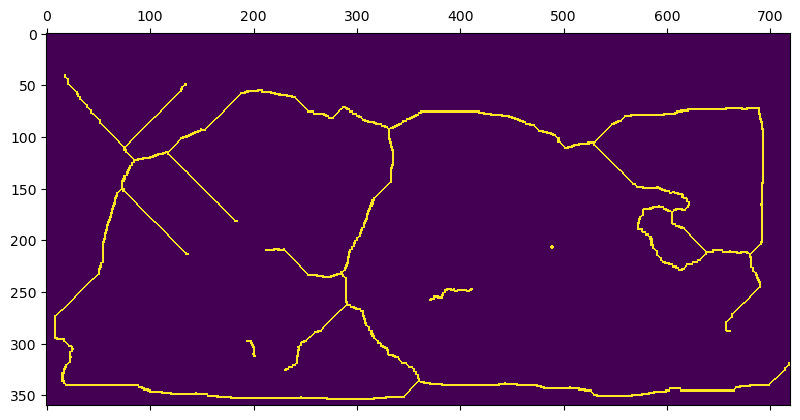

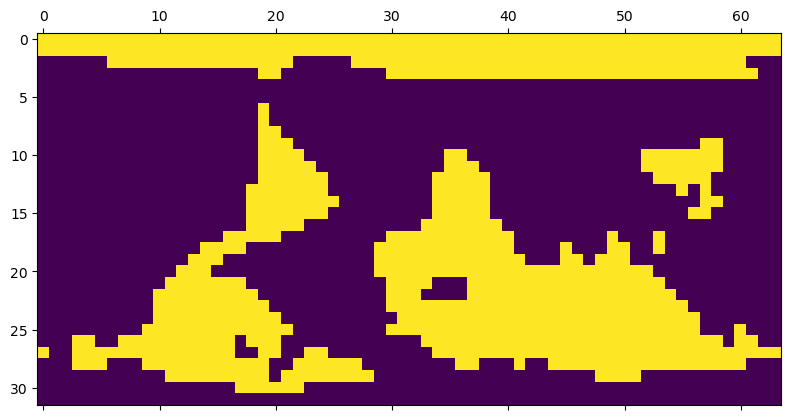

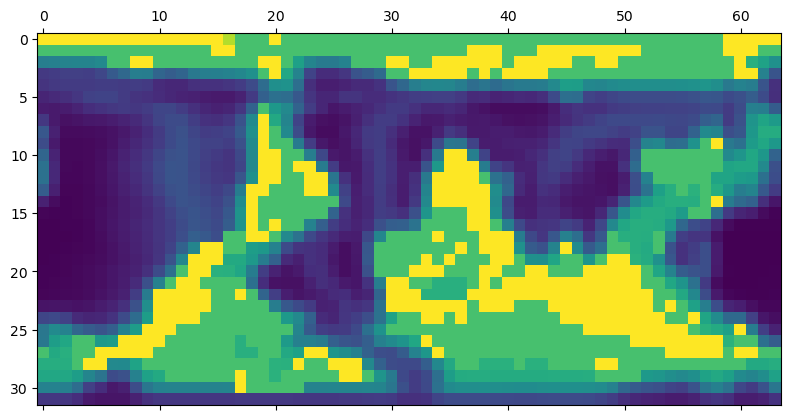

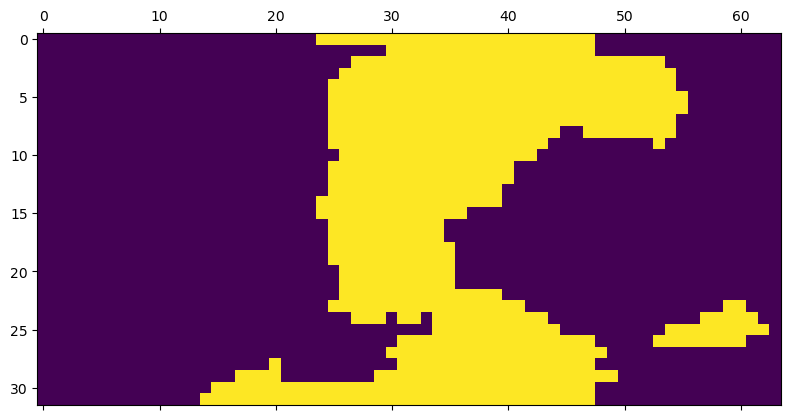

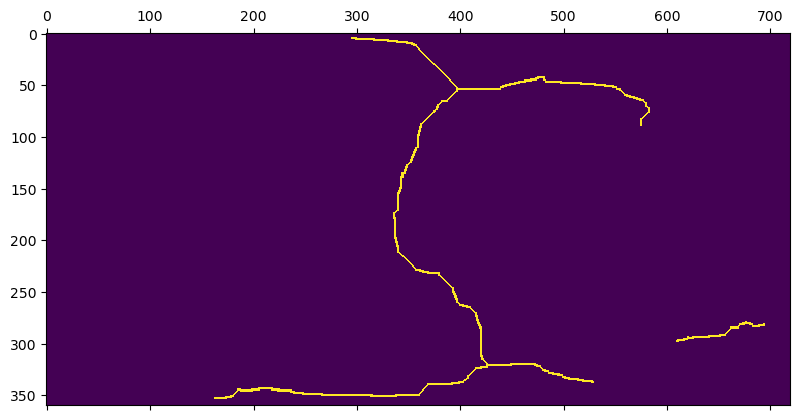

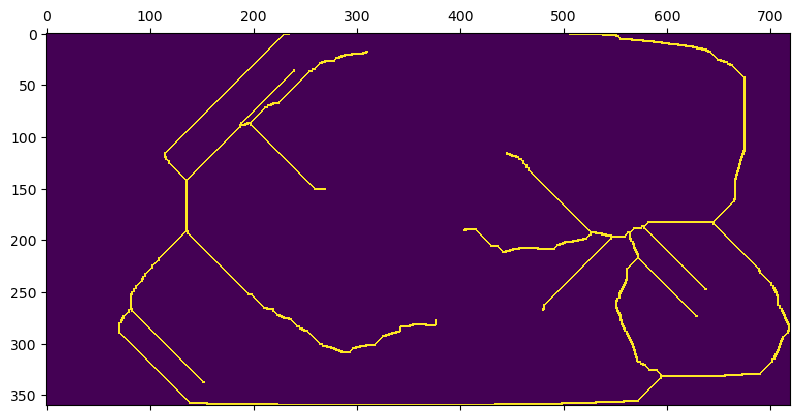

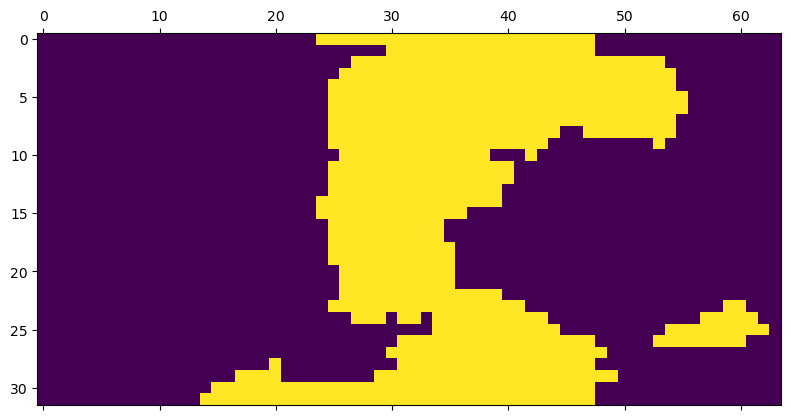

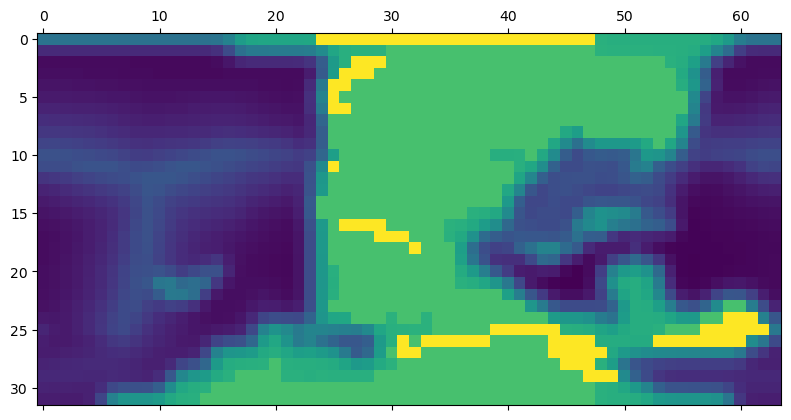

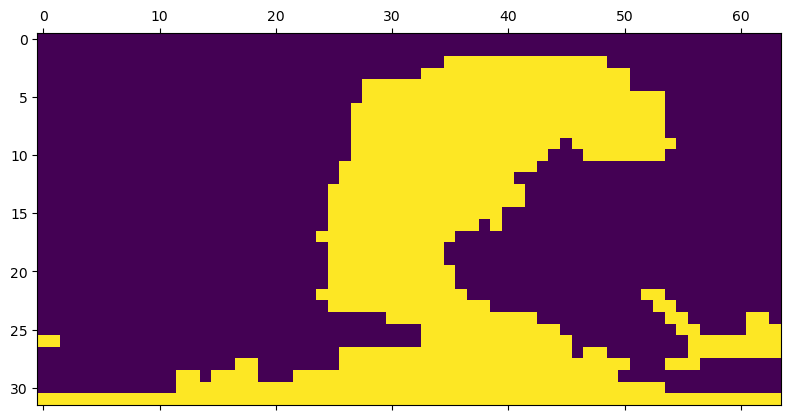

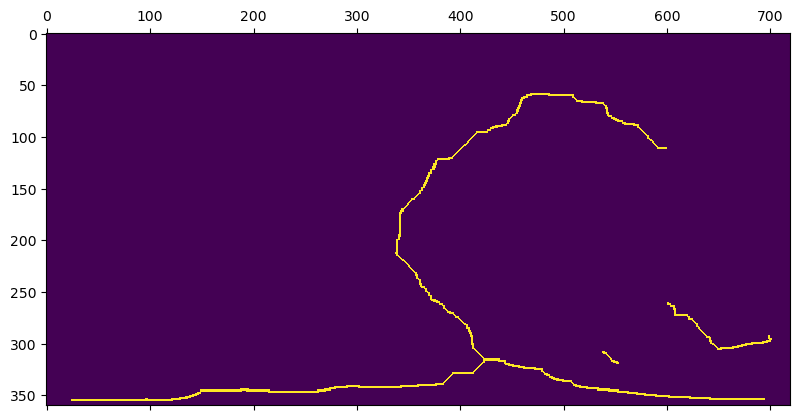

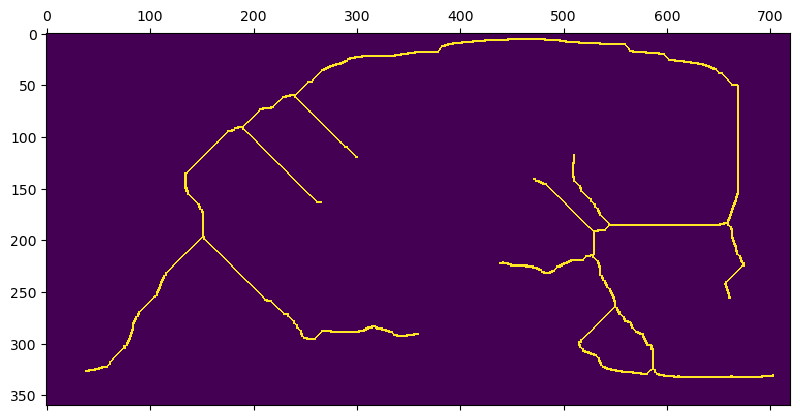

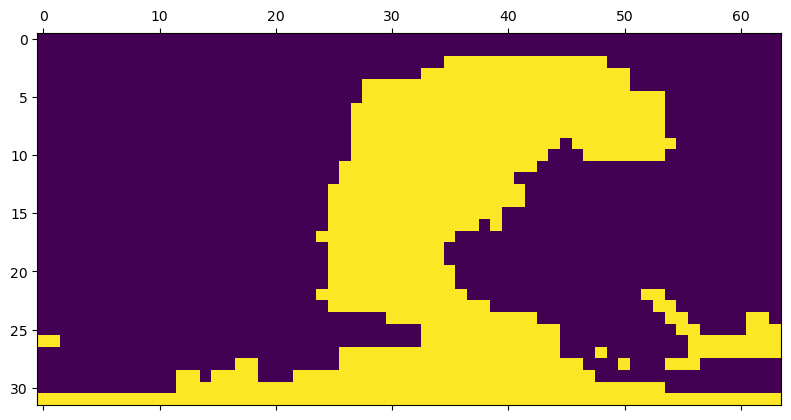

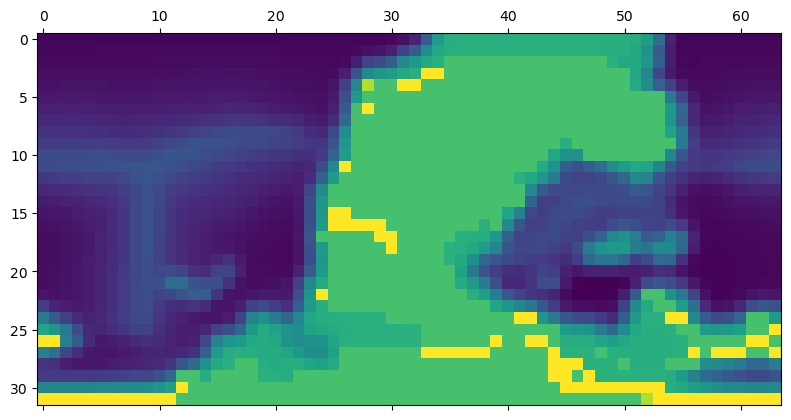

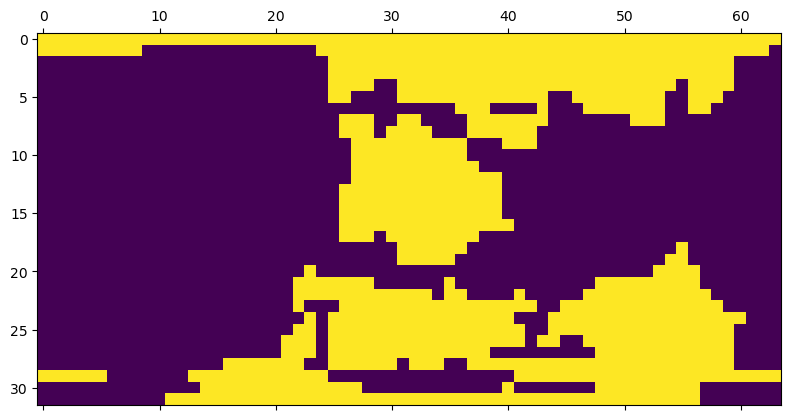

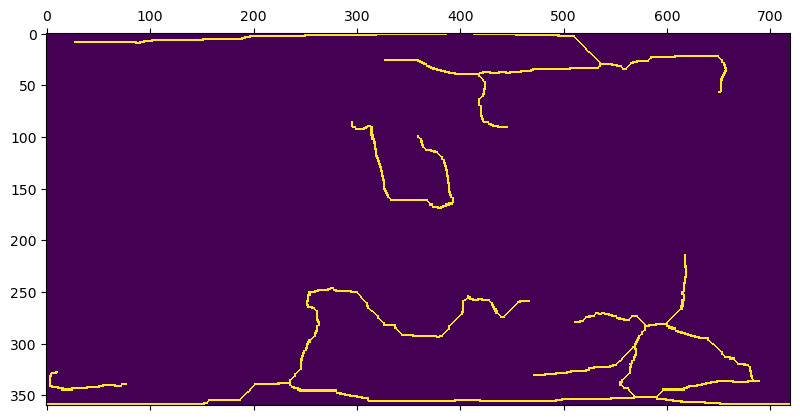

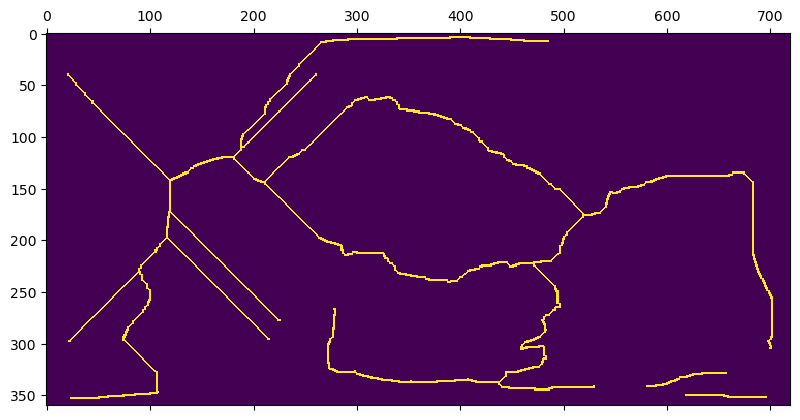

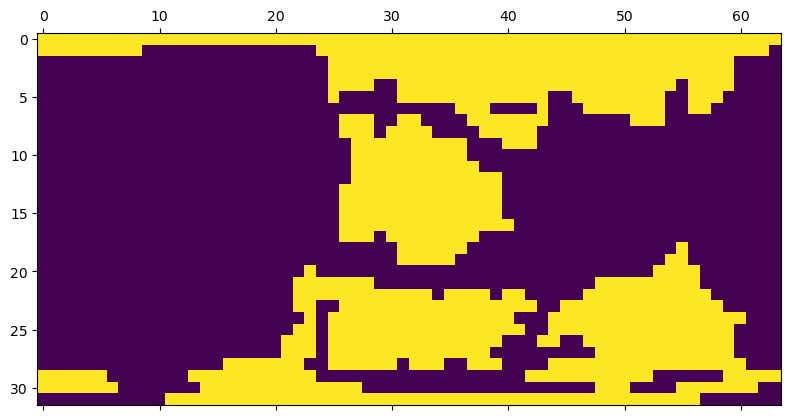

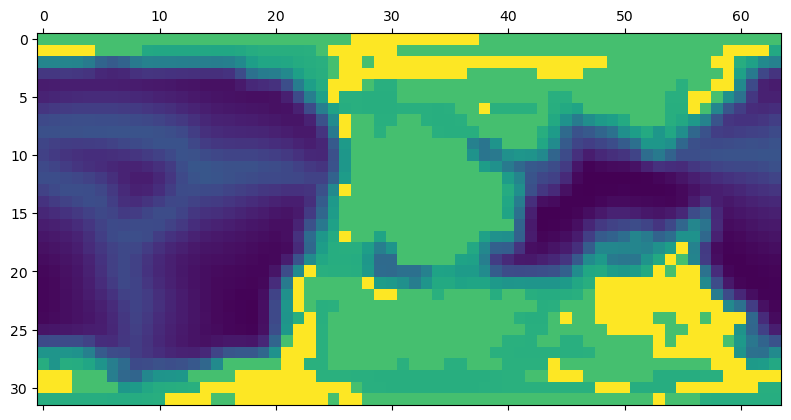

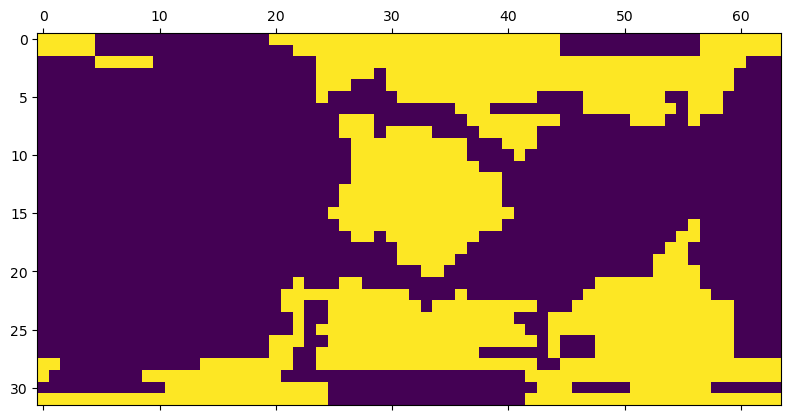

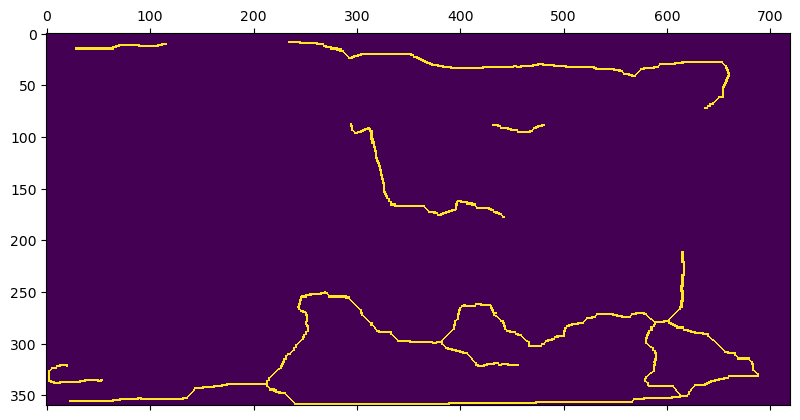

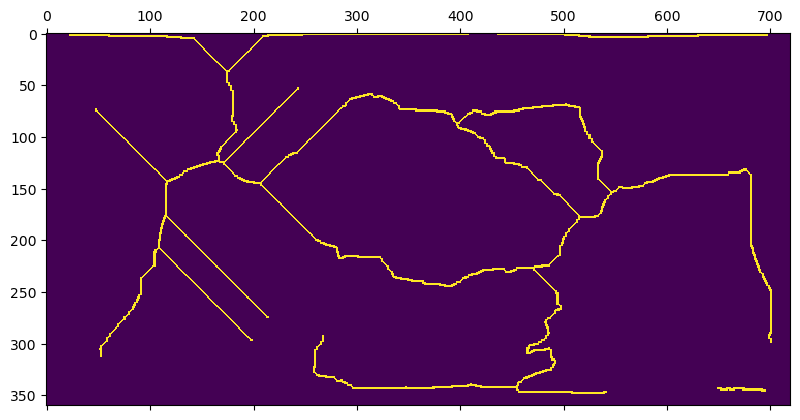

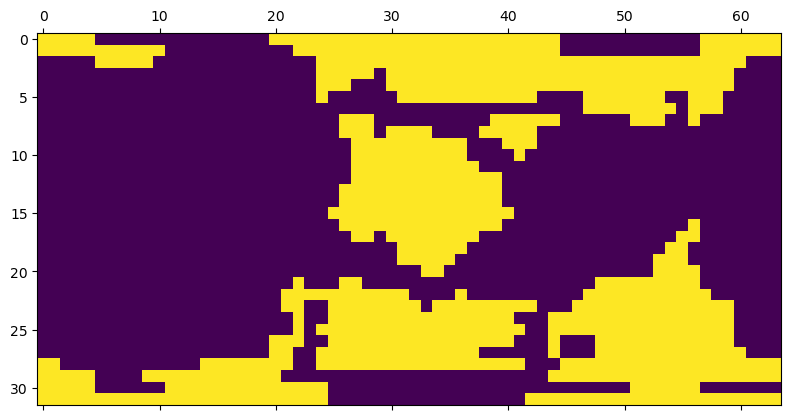

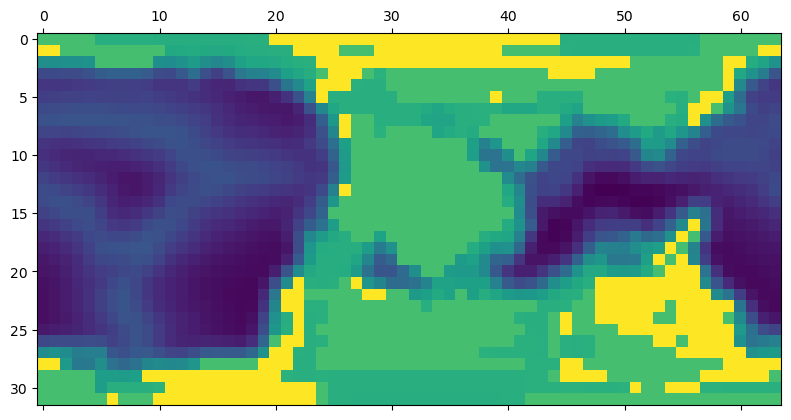

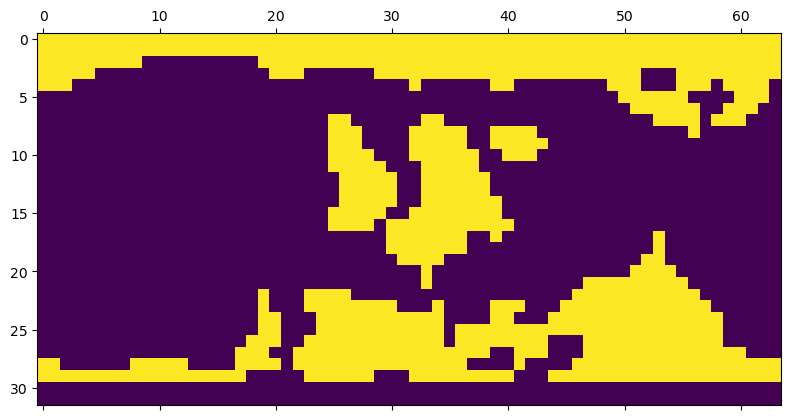

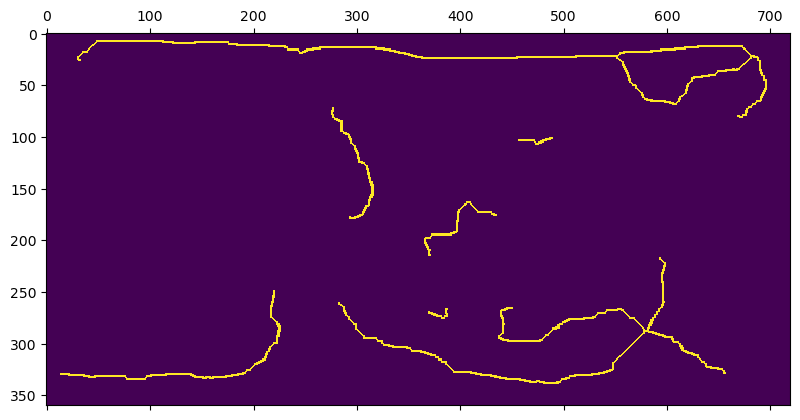

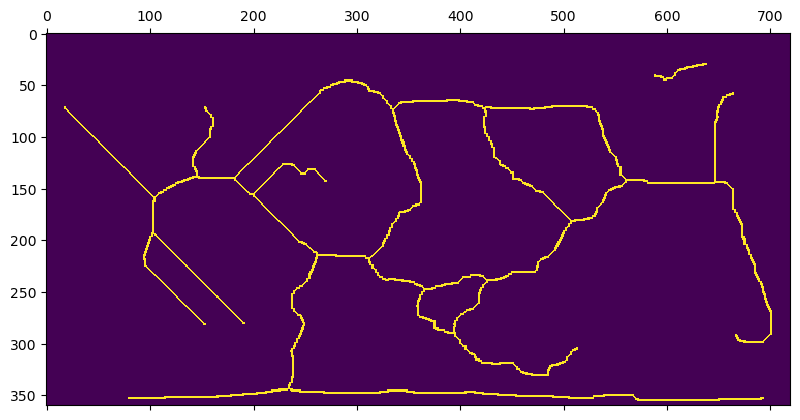

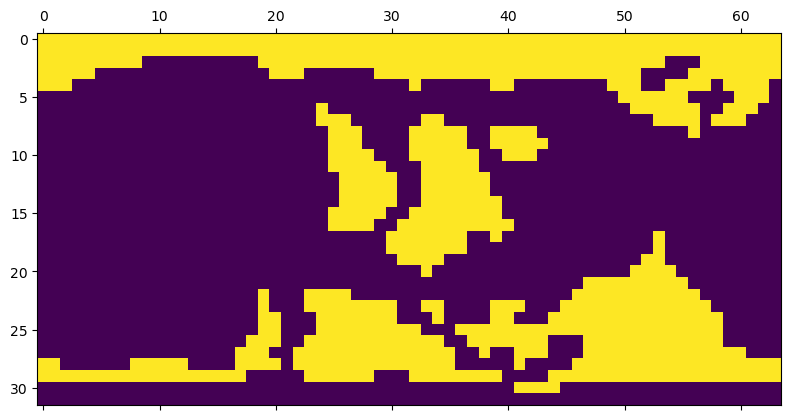

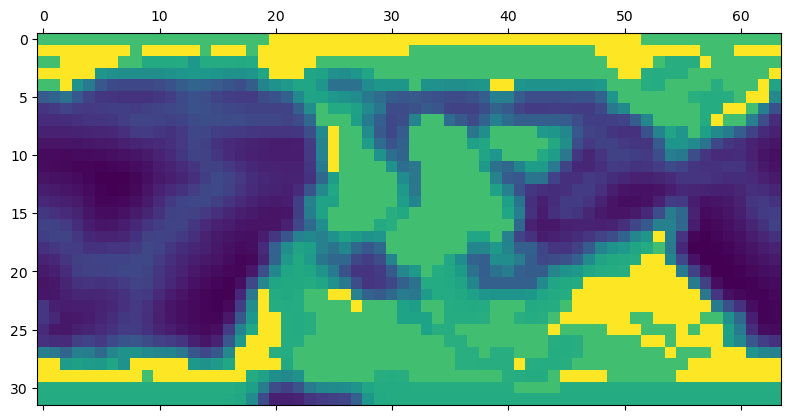

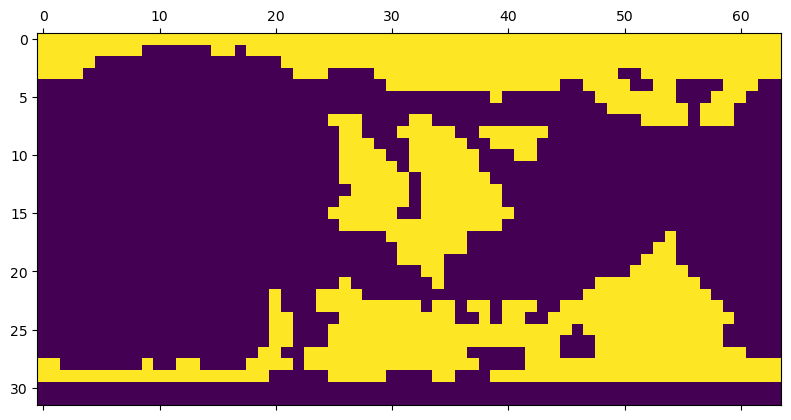

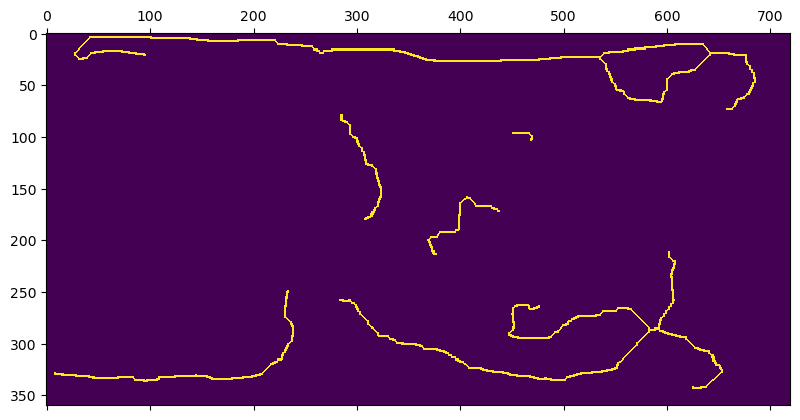

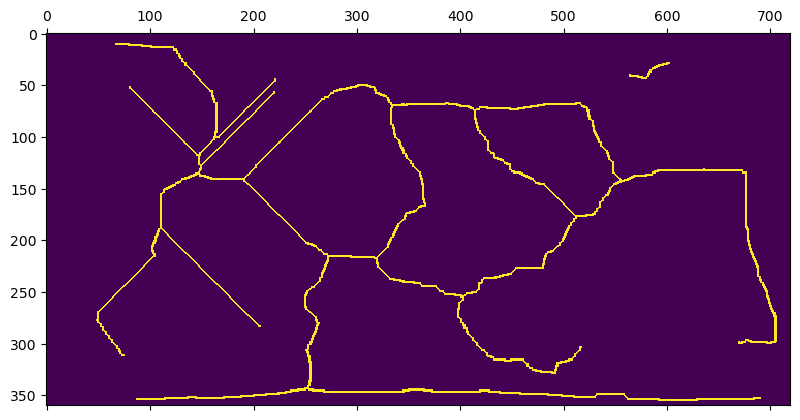

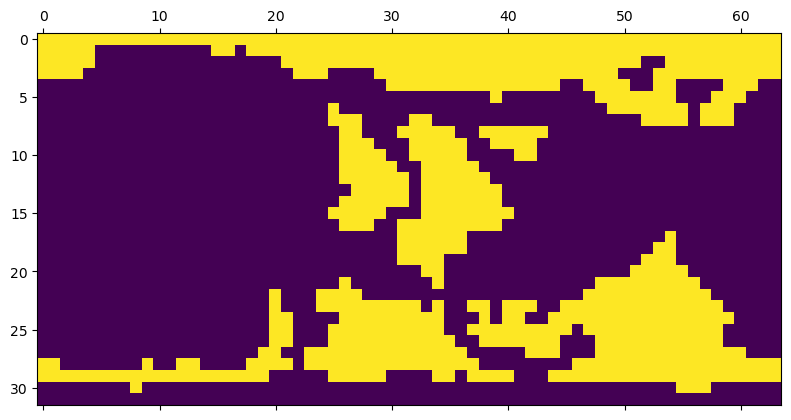

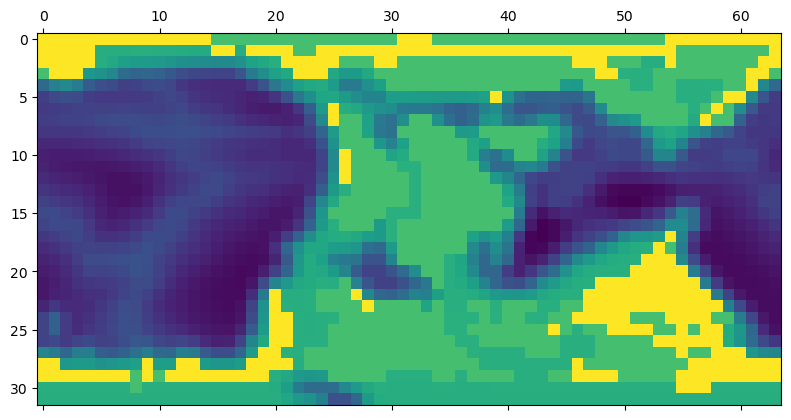

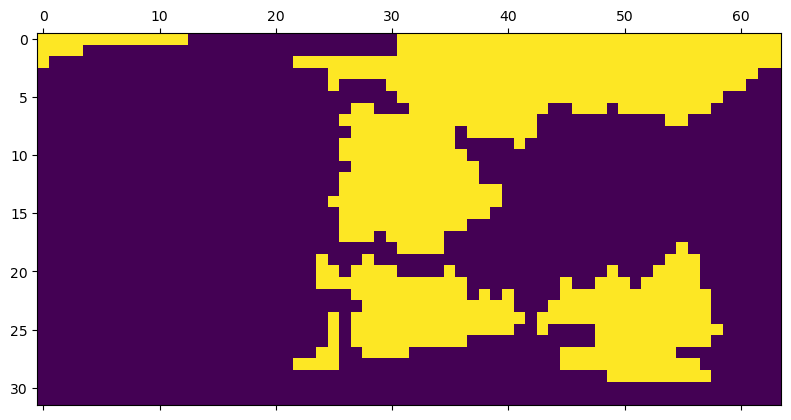

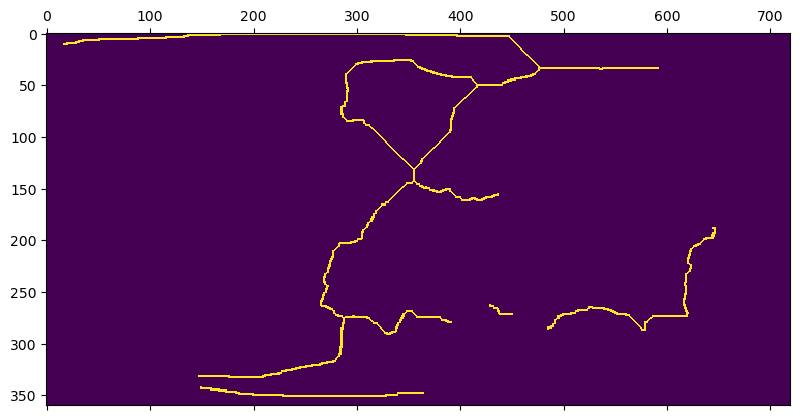

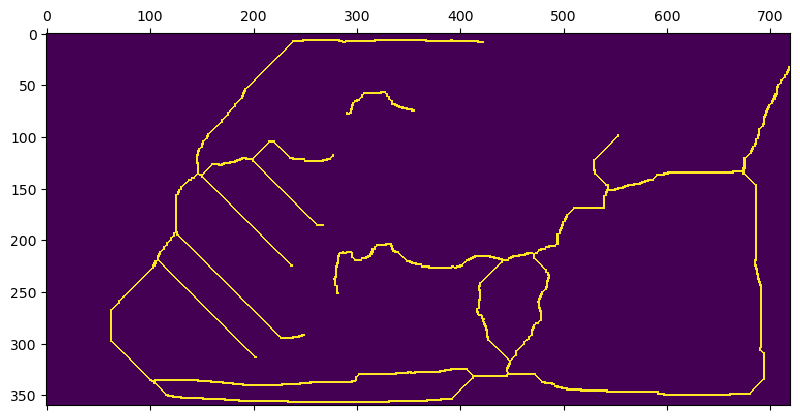

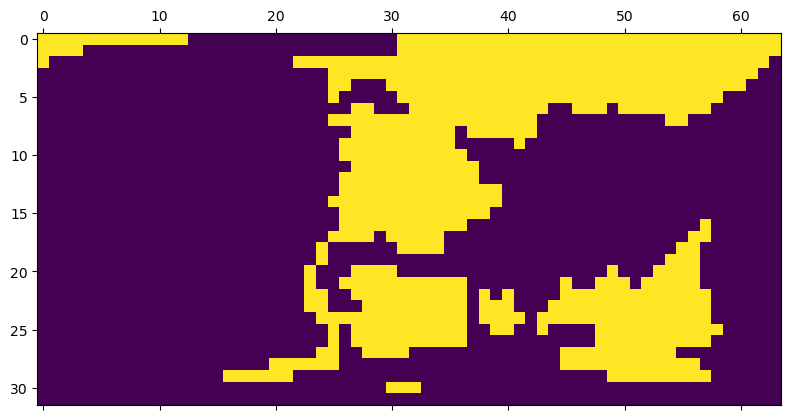

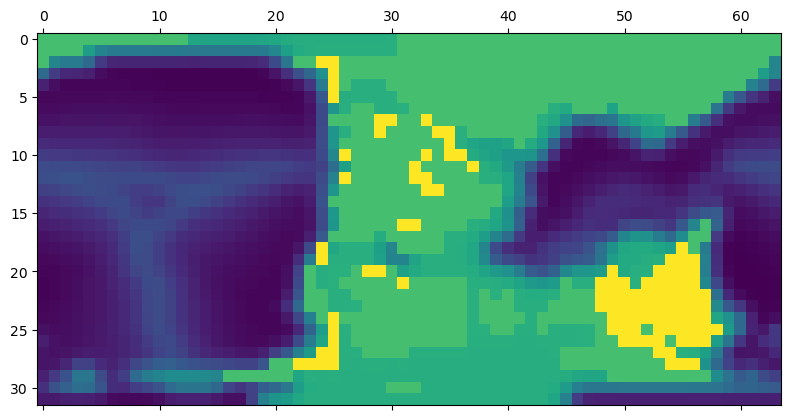

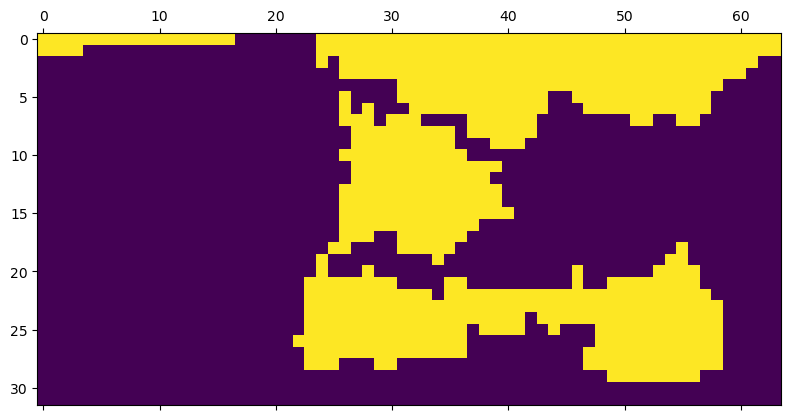

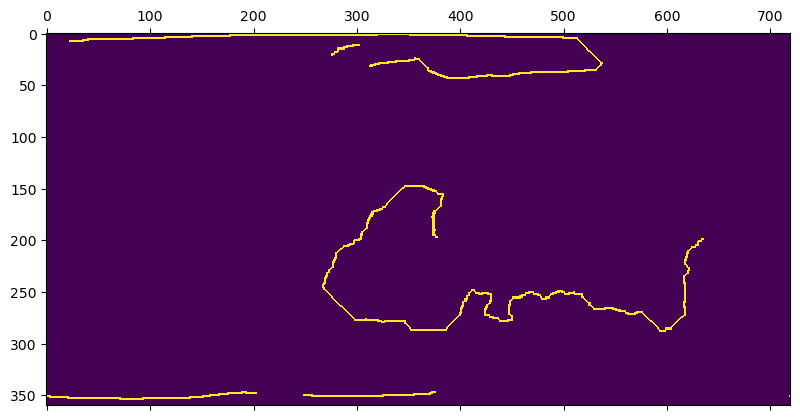

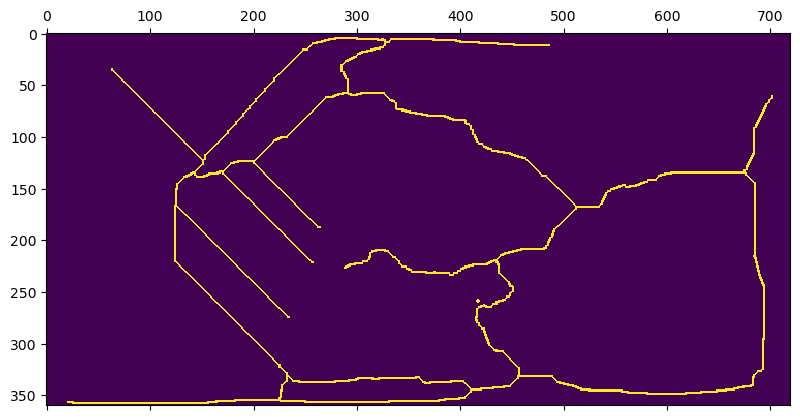

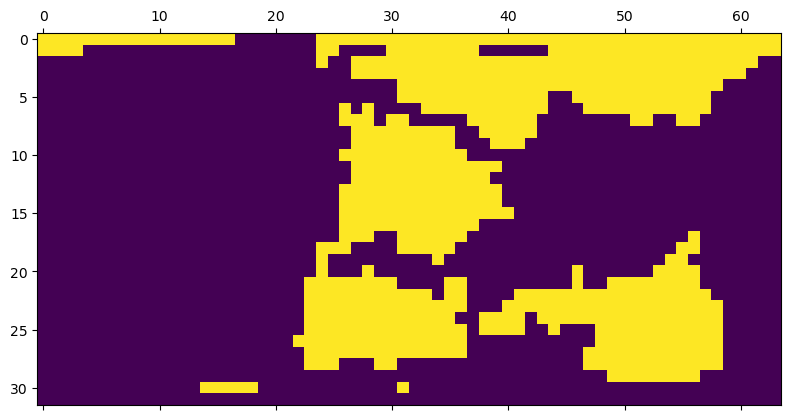

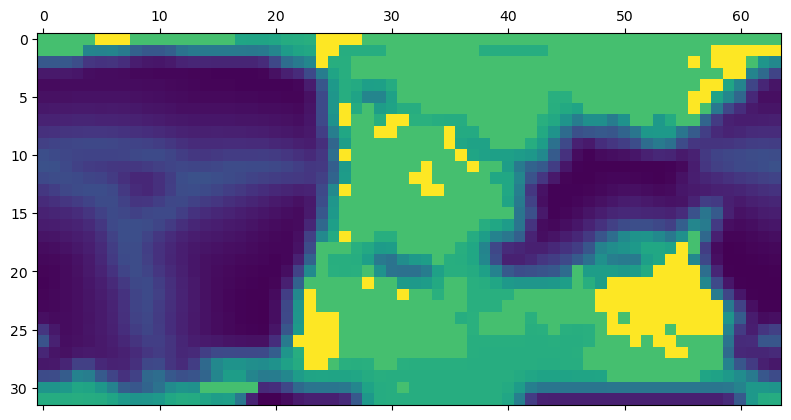

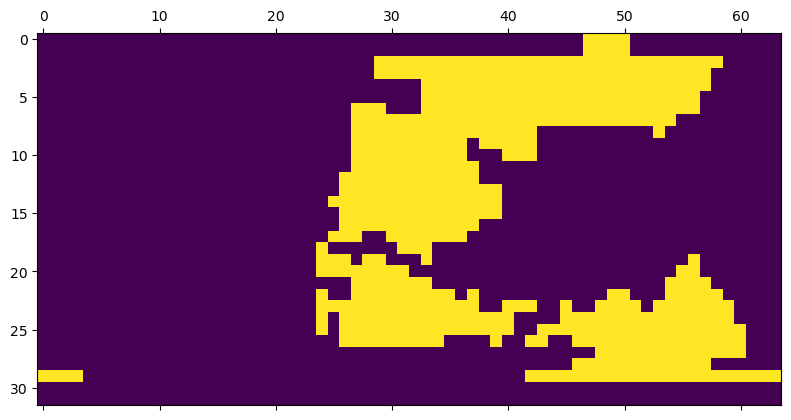

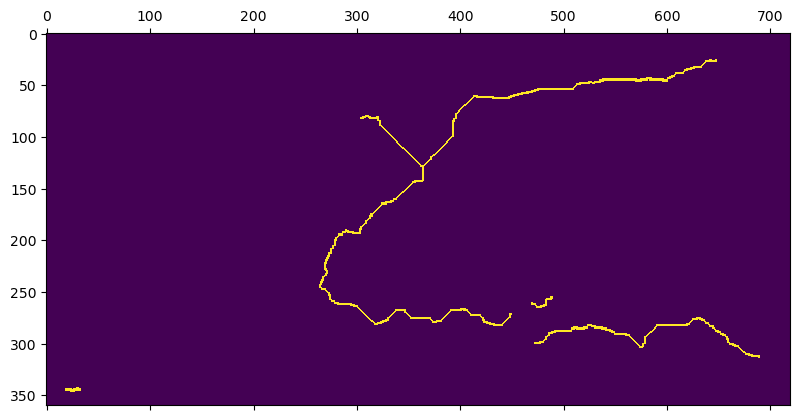

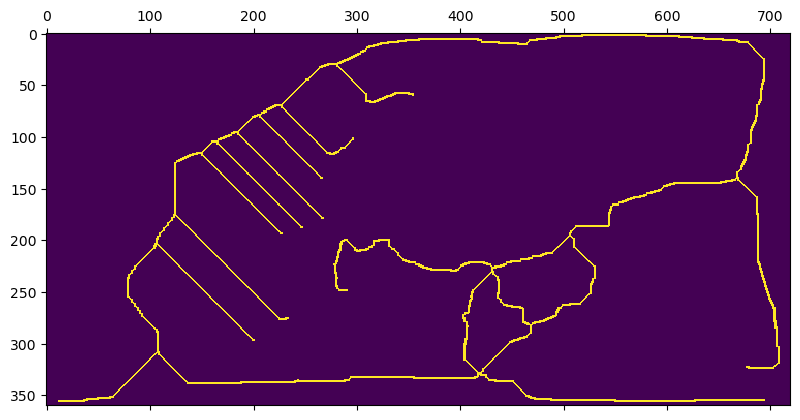

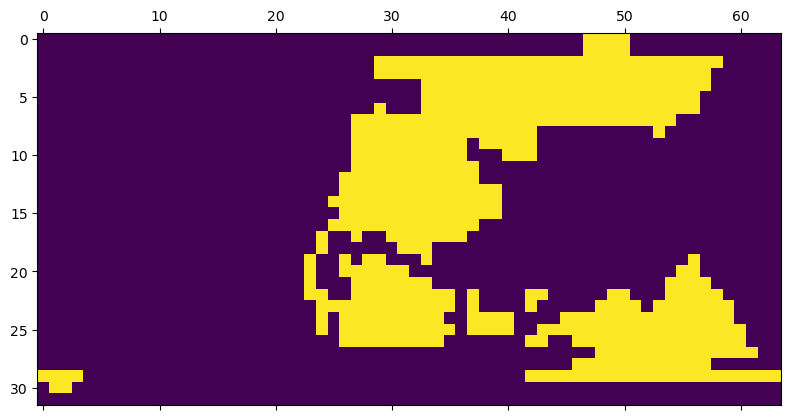

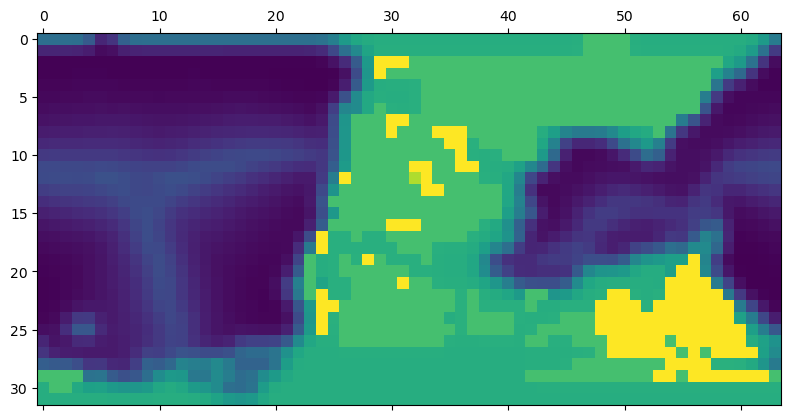

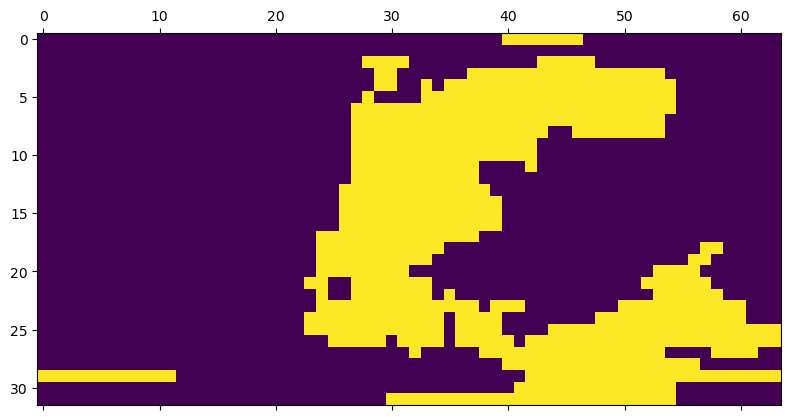

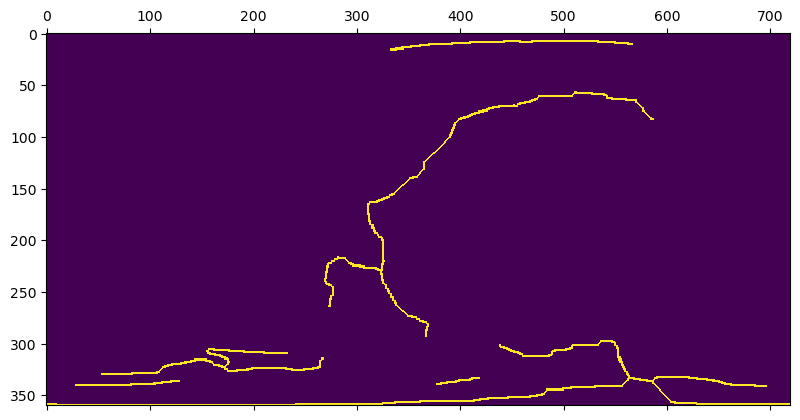

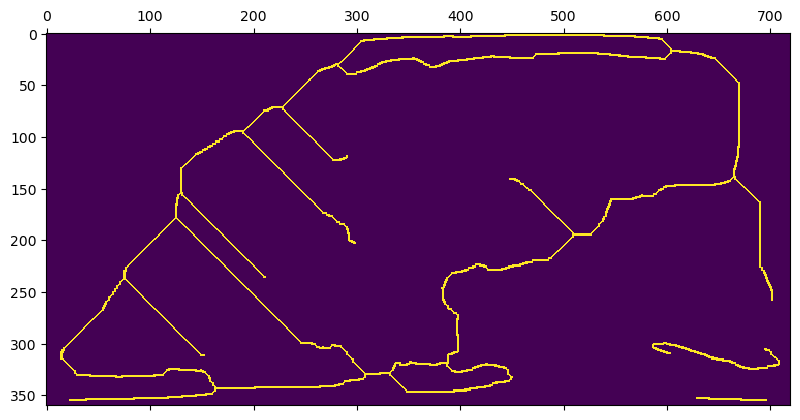

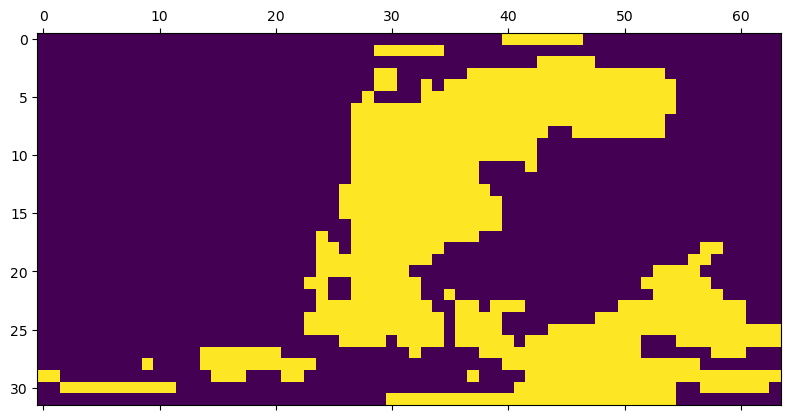

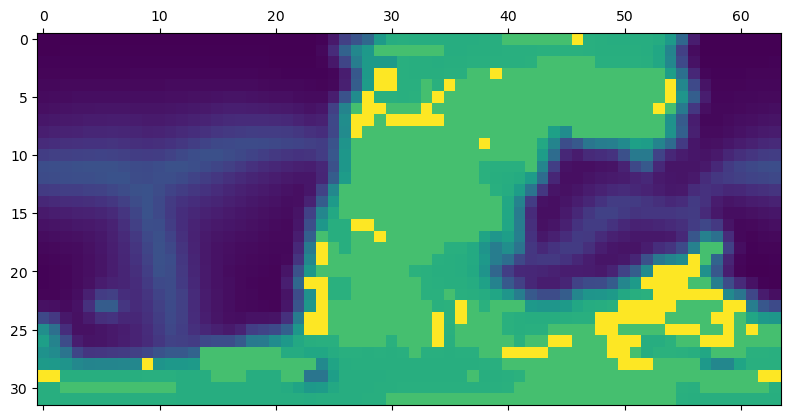

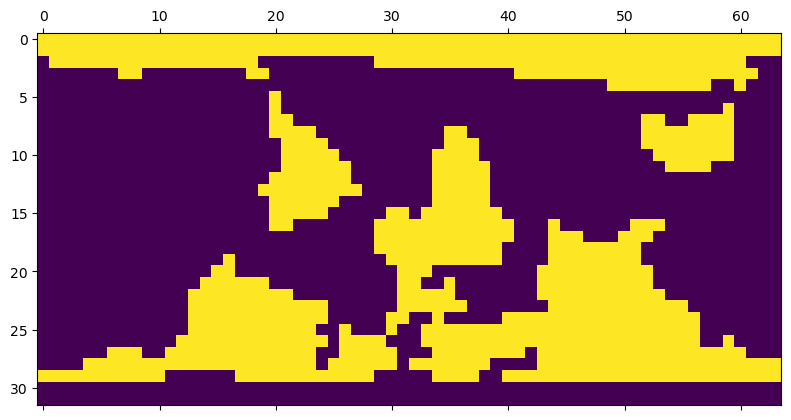

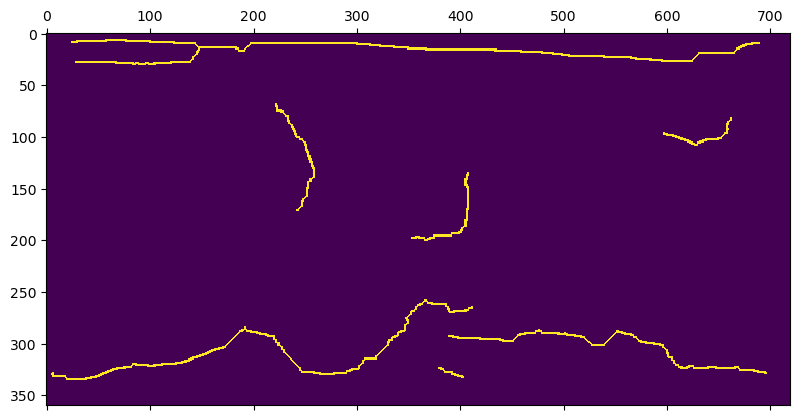

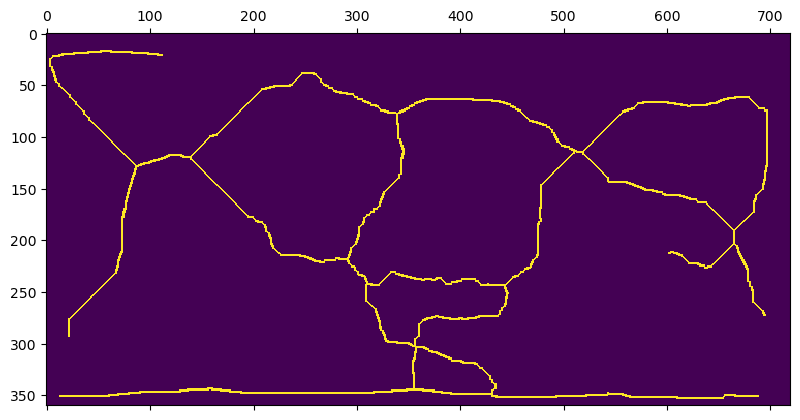

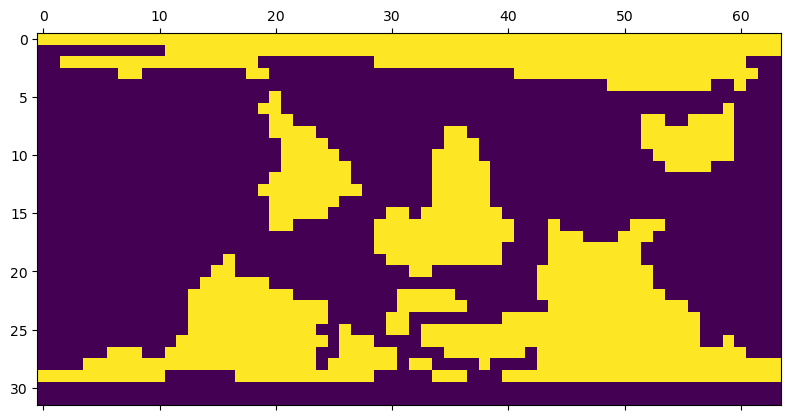

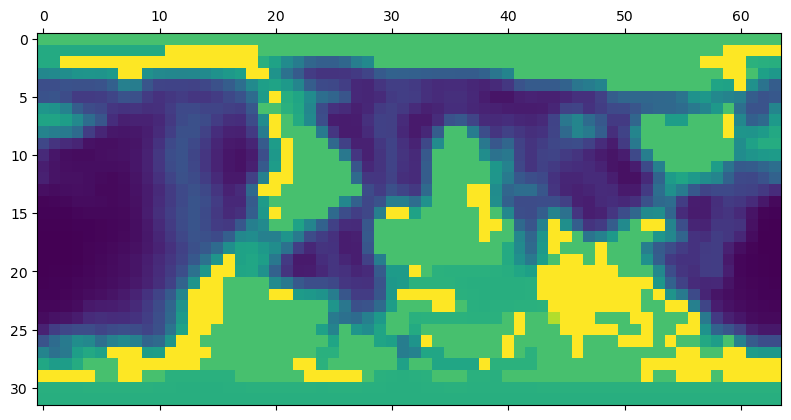

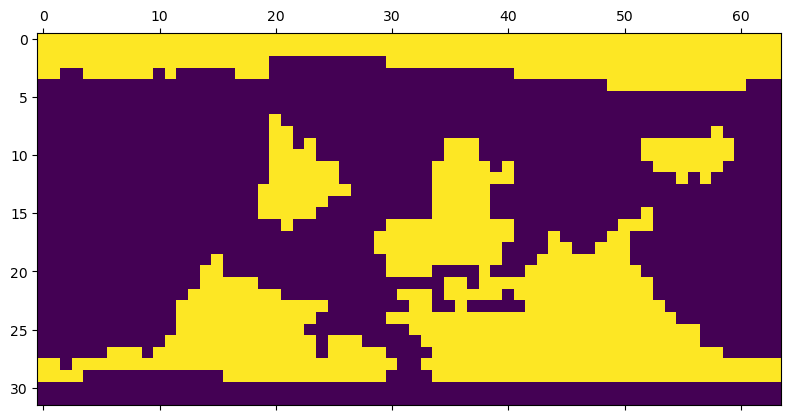

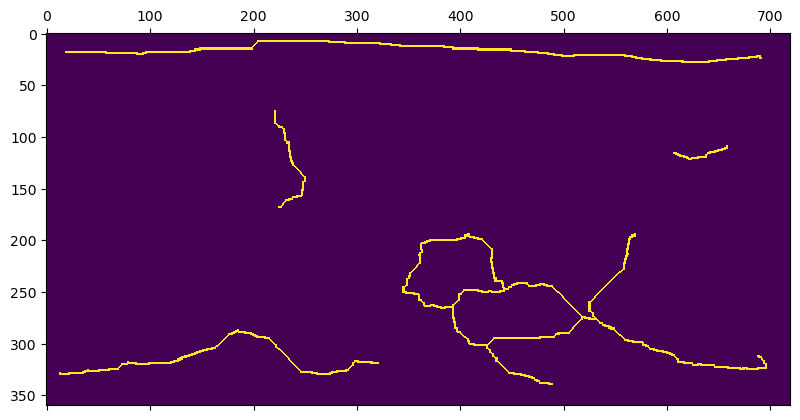

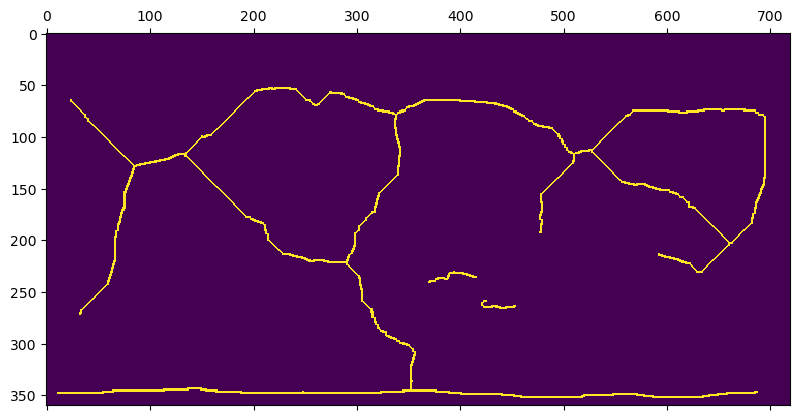

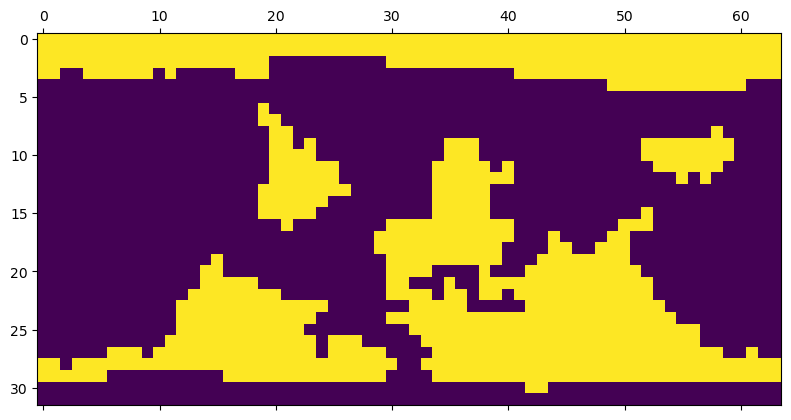

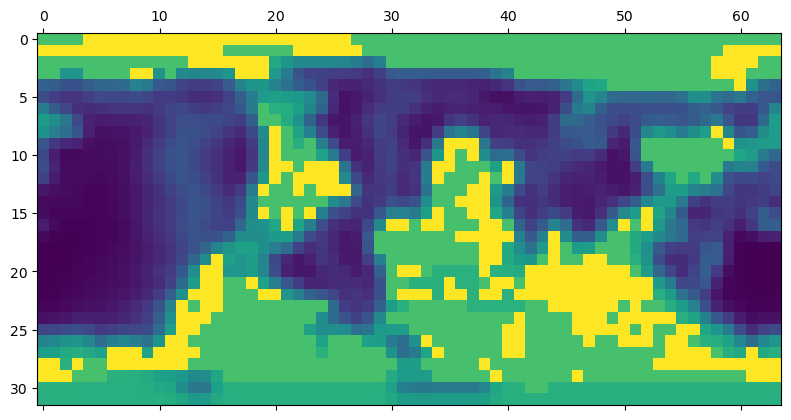

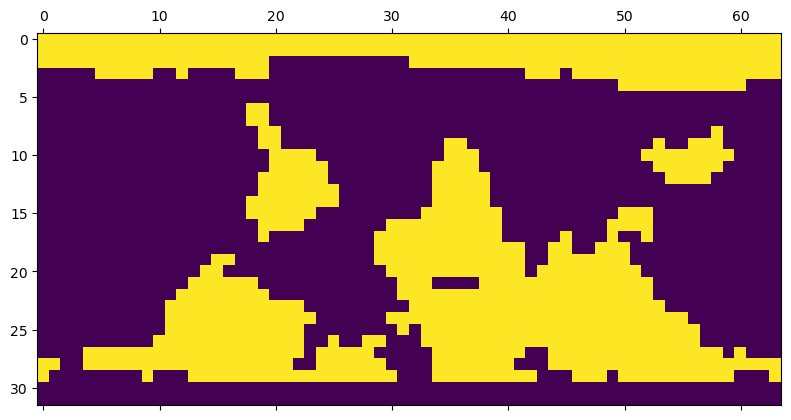

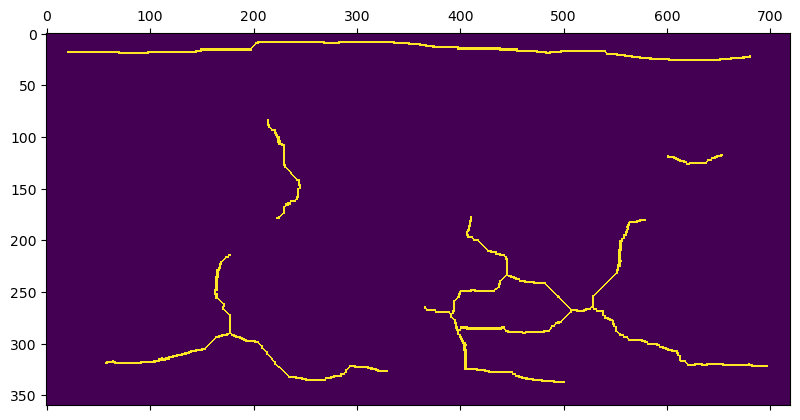

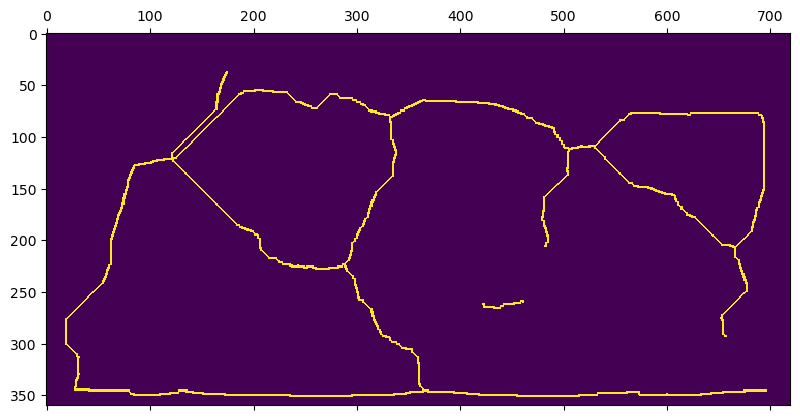

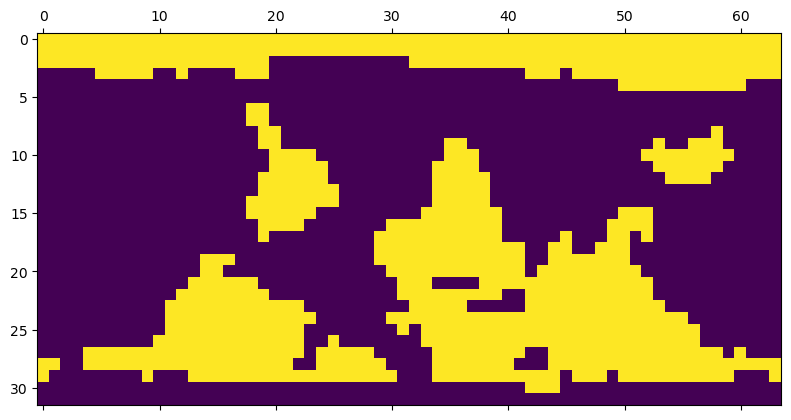

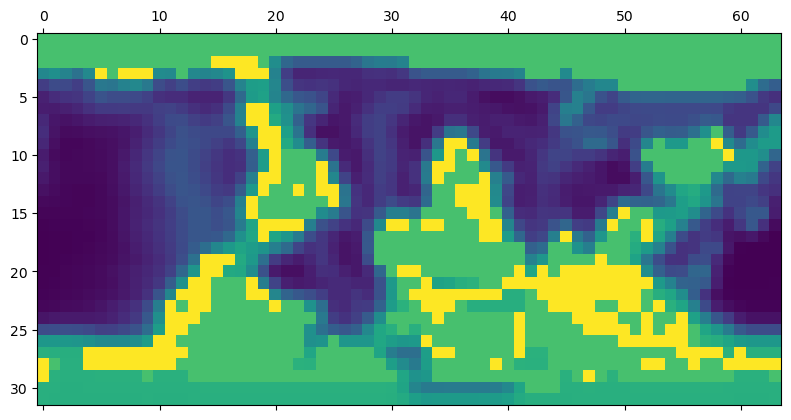

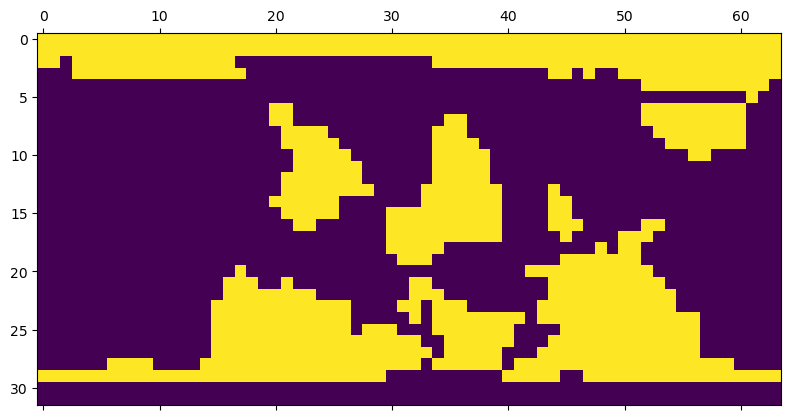

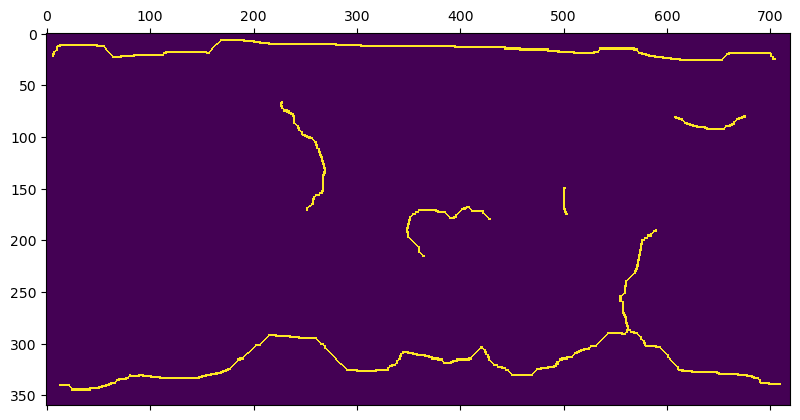

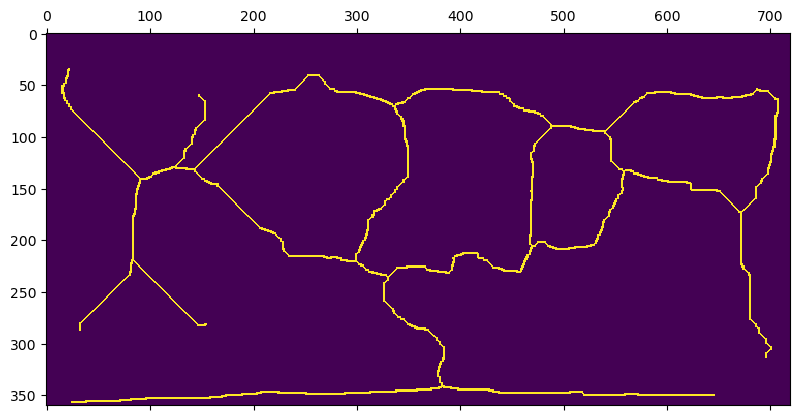

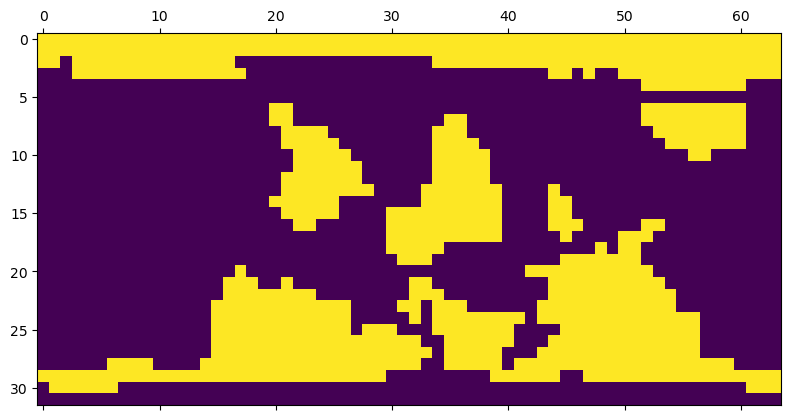

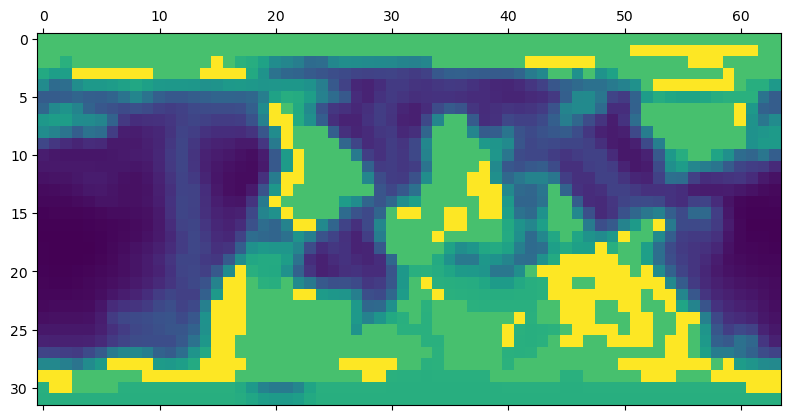

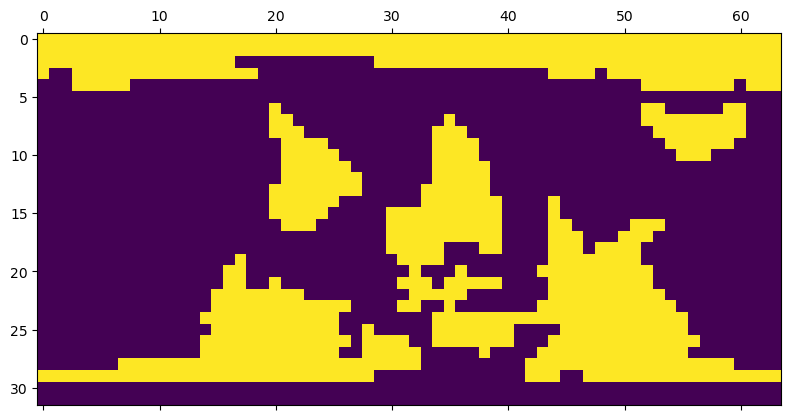

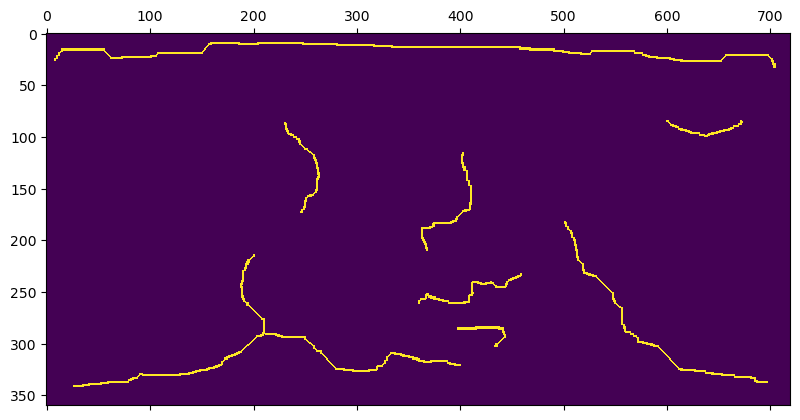

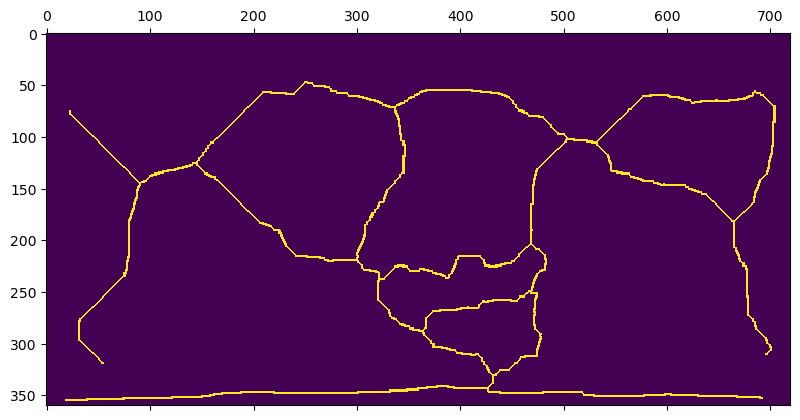

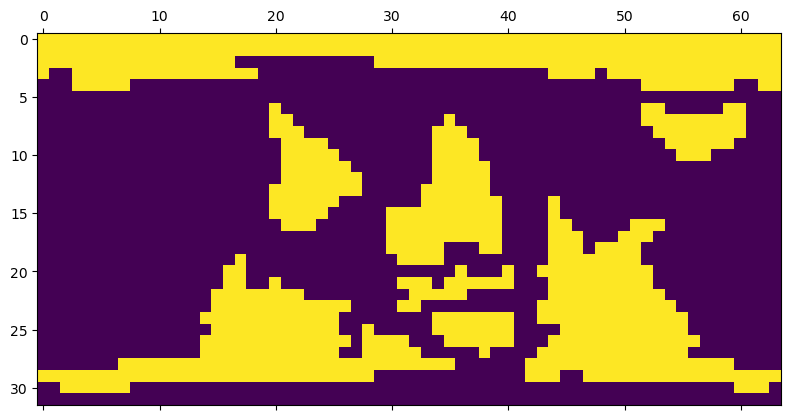

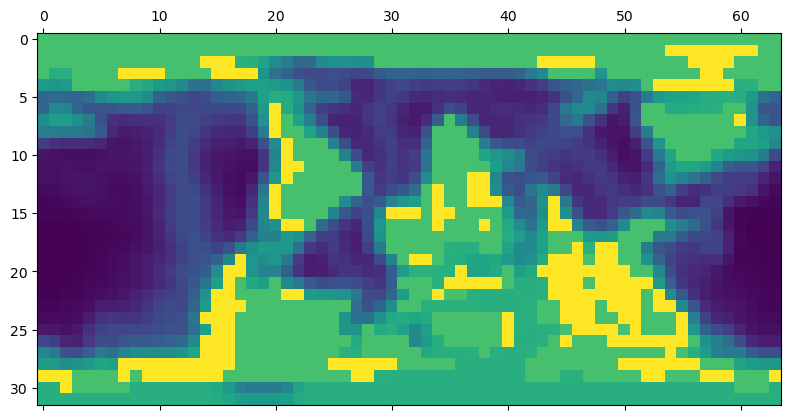

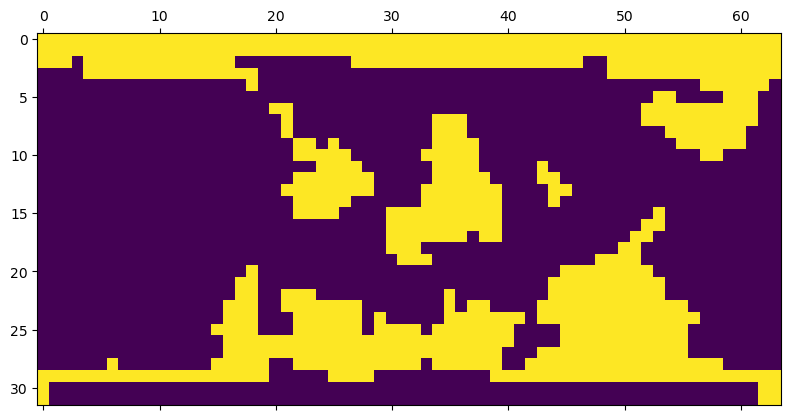

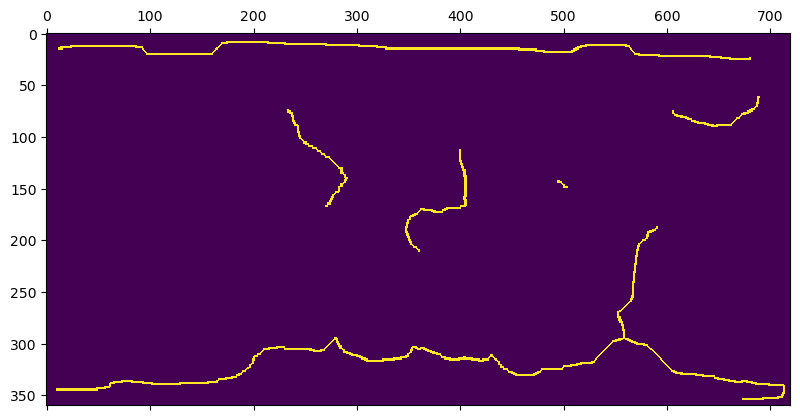

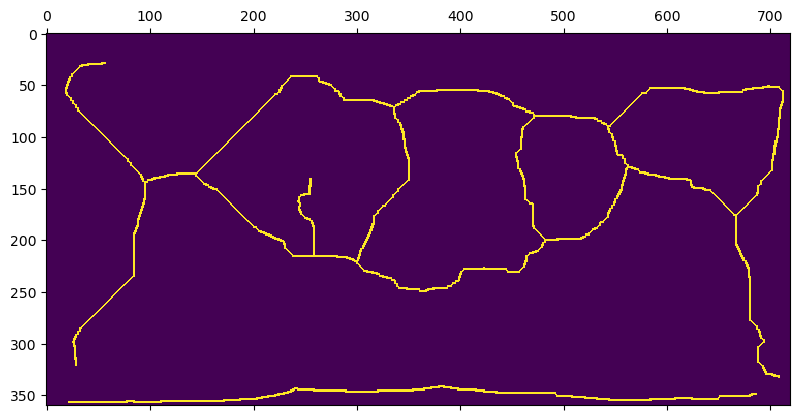

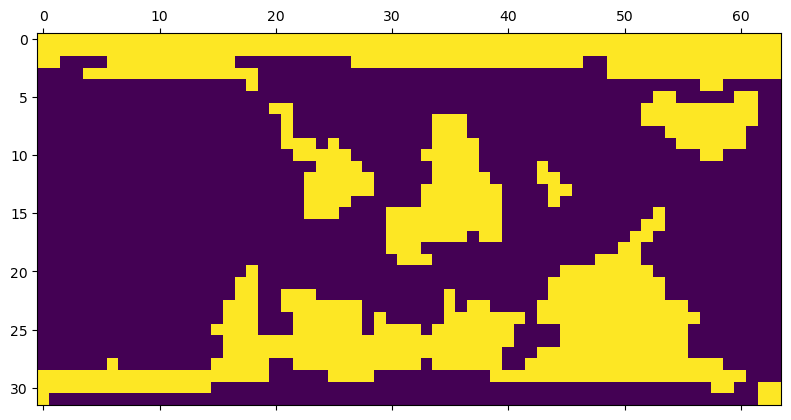

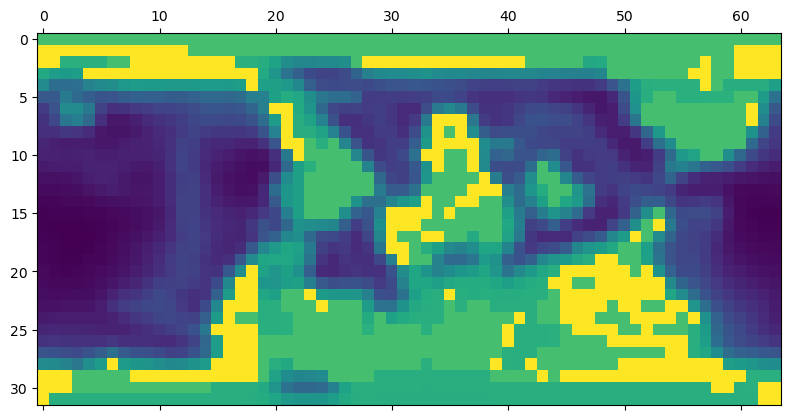

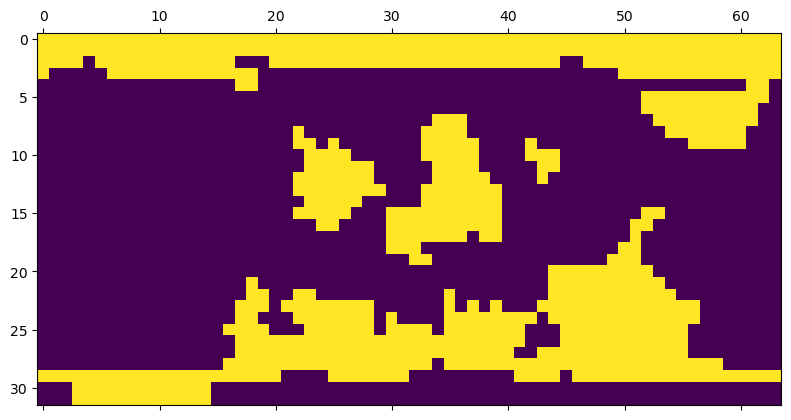

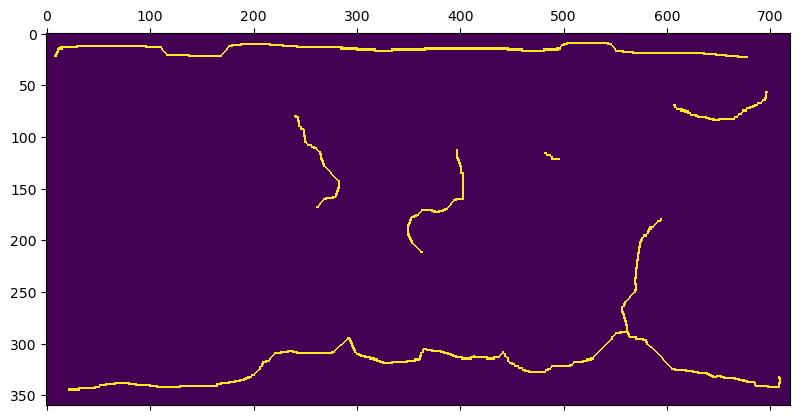

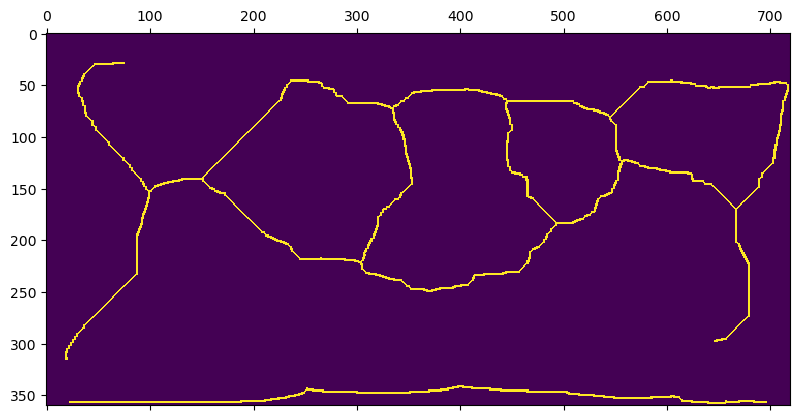

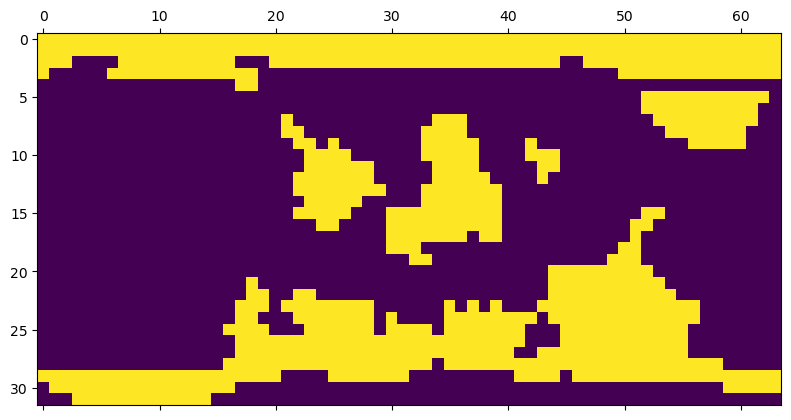

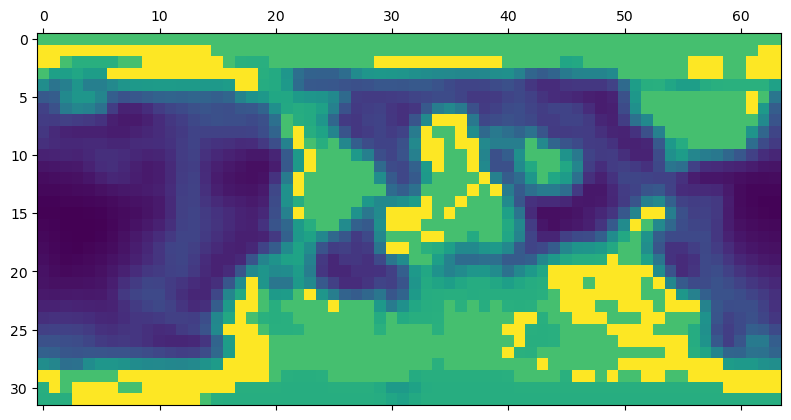

In [148]:
outdir = 'skeletonsEnforced'
if os.path.exists(outdir):
    shutil.rmtree(outdir)
os.makedirs(outdir)

for f in os.listdir(coarsenedPath):
    if f.endswith('.nc'):
        print(f)
        grid = os.path.join(coarsenedPath,f)
        age = f.split('_')[-1].rstrip('.nc') # May need changing based on filename
        land_skel = f'skeletons/skeleton_land_topo_{age}_filled.nc'
        ocean_skel = f'skeletons/skeleton_ocean_topo_{age}_filled.nc'
    else:
        continue   
    # Open the grid as an xarray dataset
    ds = xr.open_dataset(grid)
    ds = pygmt.grdsample(grid=ds['z'], region='d', registration='p')

    # Convert the xarray dataset to a pandas dataframe and preprocess
    df = ds.to_dataframe()
    df = df.reset_index()
    df = df.round(1)

    # Reorganise the dataframe so latitude is the index and longitude and elevation are the column values
    topo = df.pivot(index='lat', columns='lon', values='z').values

    topo = topo.astype(int) # Make every value an integer

    # Save a copy of the original grid for later
    topoOG = topo.copy()

    # Create land and water masks
    land = np.where(topo > 0)
    water = np.where(topo <= 0)

    topo[land] = 999 # Isolate all land elevations and make it a high number
    topo[water] = 0 # Make all water cells zero

    plt.matshow(topo)
    print(age)

    # Translate skeleton to 0-360 lon and the pixel registration
    try:
        os.remove('tmp_land_skel.nc')
        os.remove('tmp_ocean_skel.nc')
    except:
        pass
    with pygmt.clib.Session() as session:
        pygmt.grdsample(grid=f'{land_skel}?pruned_trimmed_skel_noDiagonal', region='d', registration='p', outgrid='tmp_land_skel.nc')
        pygmt.grdsample(grid=f'{ocean_skel}?pruned_trimmed_skel_noDiagonal', region='d', registration='p', outgrid='tmp_ocean_skel.nc')

    # Loop over the landsea coords and check if skeleton falls in those coords
    gridres_lon=64 # Number of columns on the genie grid
    gridres_lat=32 # Number of rows on the genie grid

    halfcell=(360/gridres_lon)/2 # Half the model cell width in degrees
    lats = np.linspace(-90 + halfcell, 90 - halfcell, gridres_lat)
    lons = np.linspace(-180 + halfcell, 180 - halfcell, gridres_lon)

    # Land skeleton
    skel = xr.open_dataset('tmp_land_skel.nc')
    # skel = xr.open_dataset('tmp_ocean_skel.nc')
    skeleton = skel['z']
    skeleton = xr.where(skeleton>=0.2,1,0)
    plt.matshow(skeleton)

    skelDF = skeleton.to_dataframe().reset_index()

    # Create new dataframe with just the places where skeletons are
    # Also filters out skeletons within one grid cell of the poles- makes things less complicated and lets the pole filtering do its thing
    skeleton_ones = skelDF[(skelDF['z'] == 1) & (np.abs(skelDF['lat']) < (90-2*halfcell))]
    lats_ones = skeleton_ones['lat'].values.tolist()
    lons_ones = skeleton_ones['lon'].values.tolist()

    count=0
    for i in range(len(lats)):
        lat = lats[i]
        for j in range(len(lons)):
            lon = lons[j]

            val = topo[i][j]

            if int(val)==999:
                continue

            # Define bounding box
            lat_min = lat - halfcell
            lat_max = lat + halfcell
            lon_min = lon - halfcell
            lon_max = lon + halfcell


            for lat_one, lon_one in zip(lats_ones, lons_ones):
                if (lat_min <= lat_one <= lat_max) and (lon_min <= lon_one <= lon_max):
                    count+=1

                    # Change the cell in 'landsea' to 1
                    # condition = (landsea['lat'] == lat) & (landsea['lon'] == lon)
                    # landsea = landsea.where(~condition, 1)
                    topo[i][j] = 999

                    print(f"Lat extent of big cell: {lat_min, lat_max}")
                    print(f"Lon extent of big cell: {lon_min, lon_max}")
                    print(f"Lat, Lon of the skeleton cell: {lat, lon}\n")
                    break  # Breaks the loop as soon as one match is found within a cell	
    print(f"Number of times the skeleton fell within a land cell: {count}/{len(lats_ones)}")

    # Ocean skeleton
    # skel = xr.open_dataset('tmp_land_skel.nc')
    skel = xr.open_dataset('tmp_ocean_skel.nc')
    skeleton = skel['z']
    skeleton = xr.where(skeleton>=0.2,1,0)
    plt.matshow(skeleton)

    skelDF = skeleton.to_dataframe().reset_index()

    # Create new dataframe with just the places where skeletons are
    # Also filters out skeletons within one grid cell of the poles- makes things less complicated and lets the pole filtering do its thing
    skeleton_ones = skelDF[(skelDF['z'] == 1) & (np.abs(skelDF['lat']) < (90-2*halfcell))]
    lats_ones = skeleton_ones['lat'].values.tolist()
    lons_ones = skeleton_ones['lon'].values.tolist()

    count=0
    for i in range(len(lats)):
        lat = lats[i]
        for j in range(len(lons)):
            lon = lons[j]

            val = topo[i][j]

            if int(val)==0:
                continue

            # Define bounding box
            lat_min = lat - halfcell
            lat_max = lat + halfcell
            lon_min = lon - halfcell
            lon_max = lon + halfcell


            for lat_one, lon_one in zip(lats_ones, lons_ones):
                if (lat_min <= lat_one <= lat_max) and (lon_min <= lon_one <= lon_max):
                    count+=1

                    # Change the cell in 'landsea' to 1
                    # condition = (landsea['lat'] == lat) & (landsea['lon'] == lon)
                    # landsea = landsea.where(~condition, 1)
                    topo[i][j] = 0

                    print(f"Lat extent of big cell: {lat_min, lat_max}")
                    print(f"Lon extent of big cell: {lon_min, lon_max}")
                    print(f"Lat, Lon of the skeleton cell: {lat, lon}\n")
                    break  # Breaks the loop as soon as one match is found within a cell	
    print(f"Number of times the skeleton fell within a land cell: {count}/{len(lats_ones)}")

    plt.matshow(topo)

    # Convert back to original topographys
    max_lat = topoOG.shape[0] - 1
    max_lon = topoOG.shape[1] - 1

    #Make sure both grids are the same type
    original_grid = topoOG.astype(float)
    filtered_grid = topo.astype(float)

    for i in range(len(original_grid)):
        for j in range(len(original_grid[i])):
            original = original_grid[i][j]
            filtered = filtered_grid[i][j]

            # Identify the surrounding cells
            left = original_grid[i][j-1]
            if j == max_lon:
                right = original_grid[i][0] # Because the longitudes touch each other (it's a globe afterall)
            elif j != max_lon:
                right = original_grid[i][j+1]
            if i == 0:
                above = None
            elif i != 0:
                above = original_grid[i-1][j]
            if i == max_lat:
                below = None 
            elif i != max_lat:
                below = original_grid[i+1][j]

            surrounds = [above, below, right, left]
            surrounds = [val for val in surrounds if val is not None] # remove none values
            land_surrounds = [val for val in surrounds if val >= 0] # record just surrounds that are above sea level
            water_surrounds = [val for val in surrounds if val < 0] # record just bethymetries of surrounds

            if original >= 0 and filtered == 999:
                continue
            elif original <0 and filtered < 999:
                continue
            elif original < 0 and filtered == 999:
                if len(land_surrounds) > 0 and np.min(land_surrounds) > 0:
                    original_grid[i][j] = np.min(land_surrounds) # Make the elevation of any converted inland seas to the mean of the surrounding land cells
                else:
                    original_grid[i][j] = 500.
            elif original >= 0 and filtered < 999: # Shouldn't have any issues here unless we removed more than single cell islands only
                if len(water_surrounds) > 0 and np.max(water_surrounds) < 0:
                    original_grid[i][j] = np.max(water_surrounds) # Make the elevation of any converted islands to ocean to the mean of the surrounding cells
                else:
                    original_grid[i][j] = -200.
    plt.matshow(original_grid)

    # Convert to raster by incorporating into a copy of the original coarsened grid
    outname = f'skeleton_enforced_{age}.nc'
    if os.path.exists(outname):
        os.remove(outname)

    shutil.copy(f'{grid}', os.path.join(os.getcwd(), outname))

    # Open the netCDF file
    dataset = nc.Dataset(outname, mode='r+')

    var = dataset.createVariable('skeletonEnforced', np.float64, dataset.variables['z'].dimensions)
    # Save the 'skel' array to the new variable
    var[:] = original_grid
    dataset.close()
    
    # Move new grid with enforced gateways to it's own directory
    shutil.move(outname, outdir)